In [1]:
import astropy.io.fits as fits
import numpy as np
import glob
from matplotlib import pyplot as plt
from astropy.io import ascii
from astroquery.mast import Observations
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
from astropy.visualization import quantity_support
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

# program ID GO-10775.
# 

In [2]:
def lin_fit(x, m, b):
    return np.multiply(m, x) + b

# Final Project Due December 12

## Part 1: Globular Cluster MS Fitting and Distance Determination

1. Enter the HLA website at http://hla.stsci.edu

2. Perform an advanced search for observations with the Wide Field Planetary Camera 2 
(WFPC2) taken as part of program ID GO-10775. You only need to enter the program 
number in the web form.

3. Click on the “Inventory” tab so you can see a list of all of the observations. You will see 
entries for the following Milky Way globular clusters: NGC 104, NGC 362, NGC 3201, NGC 
4833, NGC 5139, NGC 6121, NGC 6218, NGC 6254, NGC 6362, NGC 6397, NGC 6656, NGC 
6752, NGC 6809, and NGC 6838.

4. Download the photometry available from the “PlotCat” link for clusters with “F606W/F814W” in the “Spectral_Element” column.

In [3]:
#Observations.get_product_list_async('10775')

In [4]:
#obs_tabl = Observations.query_criteria(obs_collection='HLA', instrument='WFPC2', proposal_id='10775', filters='F814W;F606W', calib_level=4)
#obs_tabl

In [5]:
data_names = glob.glob('/mnt/c/Users/panda/Documents/Stars/photometry_data/hst*')

In [6]:
#  Object      Pixel Position      ICRS Coordinates        f606w    f814w    f606w    f814w
#      ID       X          Y       RA          DEC     | MagAP2----------| TotMag----------| CI--------------| Flags-----------
column_names = ['Object ID', 'X', 'Y', 'RA', 'DEC', 'f606w_MagAP2', 'f814w_MagAP2', 
                'f606w_TotMag', 'f814w_TotMag', 'f606w_CI', 'f814w_CI', 'f606w_flags', 'f814w_flags']

In [7]:
Table(data=ascii.read(data_names[0]), names=column_names)

Object ID,X,Y,RA,DEC,f606w_MagAP2,f814w_MagAP2,f606w_TotMag,f814w_TotMag,f606w_CI,f814w_CI,f606w_flags,f814w_flags
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64
4,347.539,127.64,15.5443692,-70.8701632,20.227,20.206,20.057,20.022,0.948,0.983,0,0
9,323.496,138.108,15.5464065,-70.8698719,21.632,21.609,21.462,21.425,1.018,1.002,0,0
19,761.821,169.252,15.5092528,-70.8690124,21.411,21.226,21.241,21.042,0.951,1.041,0,0
20,838.922,169.352,15.5027178,-70.8690099,22.843,23.161,22.673,22.977,1.011,1.166,0,8
22,409.955,171.595,15.5390762,-70.8689434,21.424,21.293,21.254,21.109,0.833,0.973,16,0
23,217.775,173.345,15.5553649,-70.8688906,21.94,21.861,21.77,21.677,1.0,1.038,0,0
24,553.252,175.409,15.5269305,-70.8688396,22.305,22.851,22.135,22.667,1.033,1.109,0,0
25,171.695,175.826,15.5592703,-70.8688205,23.211,23.649,23.041,23.465,1.024,1.013,0,8
26,392.844,177.636,15.5405262,-70.8687753,23.249,23.482,23.079,23.298,0.963,0.991,0,8


In [8]:
#data_names[6]

5. For each cluster, plot a color-magnitude diagram (CMD) with (f606w_TOTMAG) – 
(f814w_TOTMAG) on the abscissa and f606w_TOTMAG on the ordinate. Make sure to plot 
the vertical axis flipped with brighter magnitudes at the top of the axis. Scale the CMD so 
that you focus on the main sequence and that you use the same relative range of color and 
magnitude for all of the clusters.

In [9]:
def plot_colormag(tbl, show=True):
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']

    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])

    plt.xlabel('Color (f606w - f814w)')
    plt.ylabel('Apparent Magnitude (f606w)')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(left=0.01, right=11)
    plt.ylim(top=14, bottom=25)
    
    plt.legend()
    #plt.ylim(bottom=26, top=22)
    if show:
        plt.show()

In [10]:
tbl = Table(data=ascii.read(data_names[6]), names=column_names)
abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
ordinate = tbl['f606w_TotMag']

In [11]:
H, abs_edge, ord_edge = np.histogram2d(abscissa, ordinate, bins=10)

In [12]:
plt.rcParams.update({'font.size': 14})


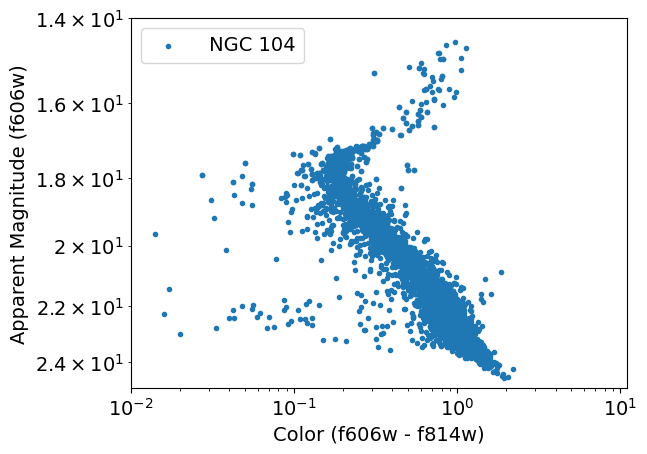

In [13]:
plot_colormag(tbl, show=False)

#for ll in ord_edge:
#    plt.axhline(ll, color='red')
#for bb in abs_edge:
#    plt.axvline(bb, color='red')

In [14]:
pwd

'/mnt/c/Users/panda/Documents/HomeworkBack/Stars/FinalProject'

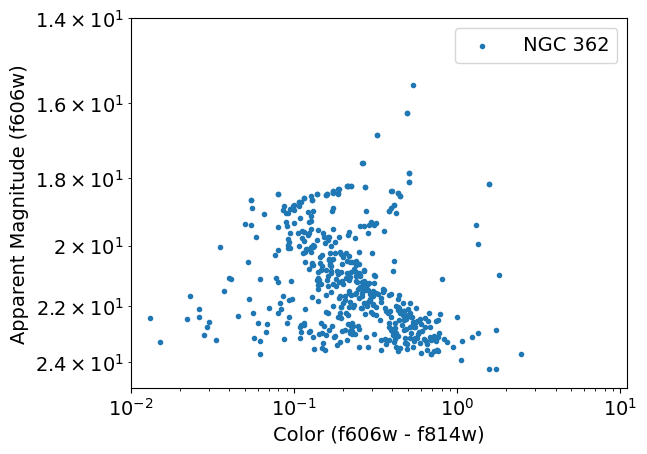

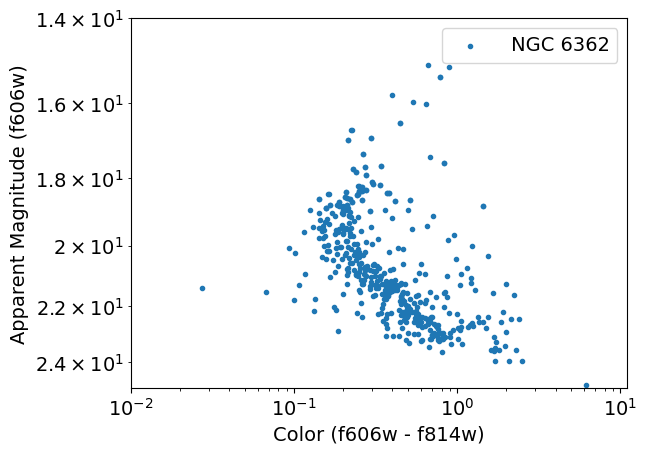

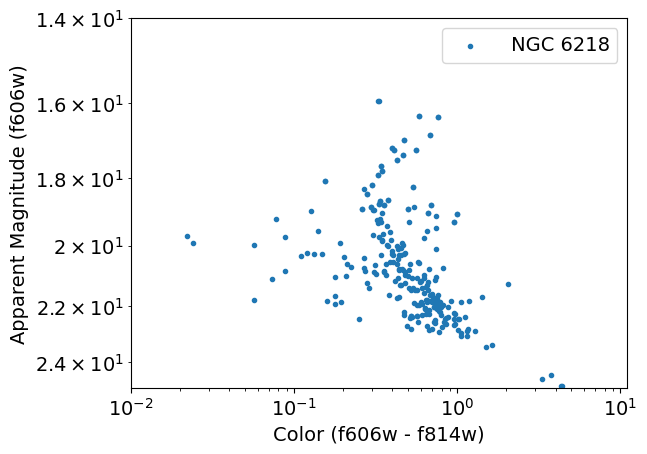

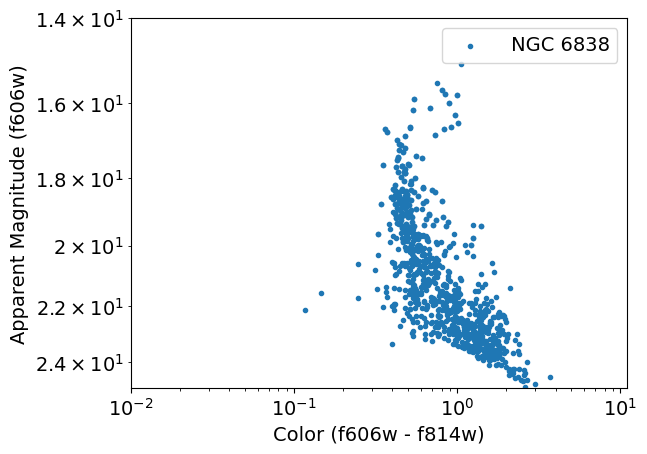

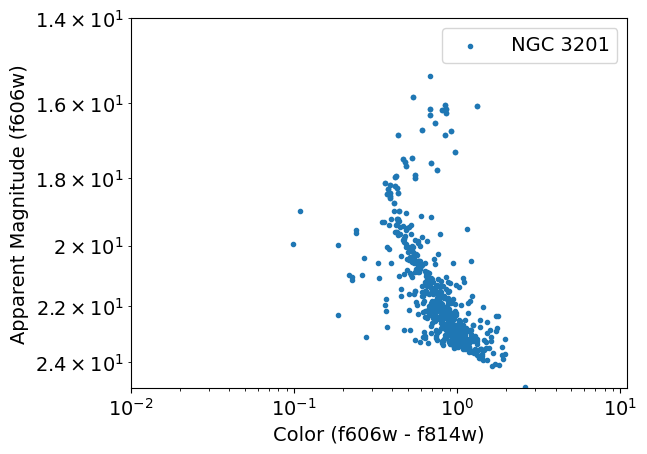

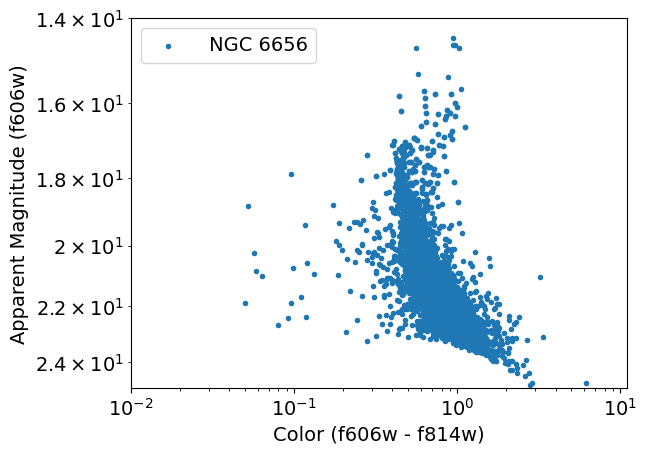

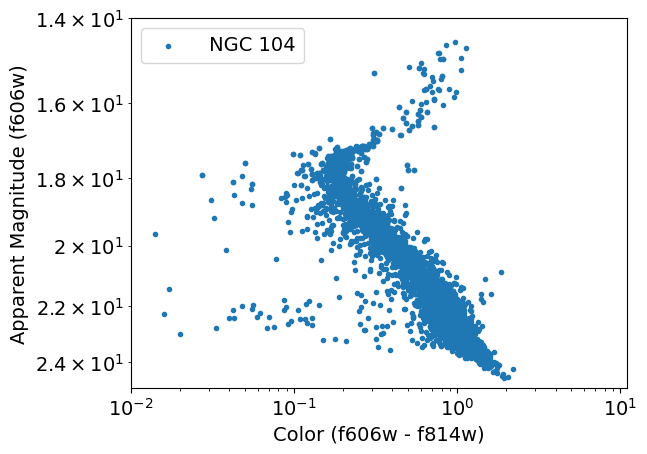

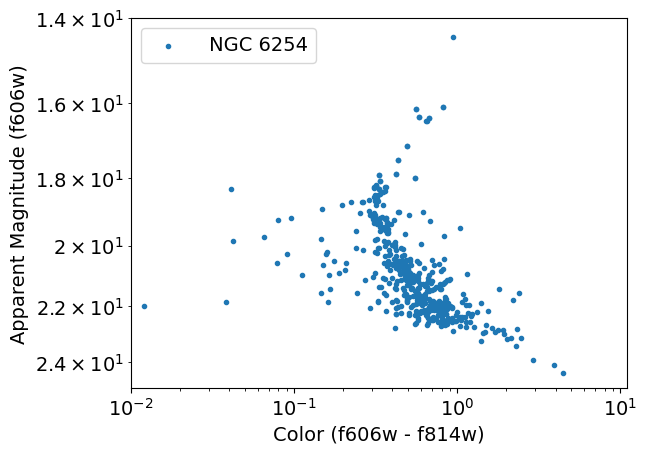

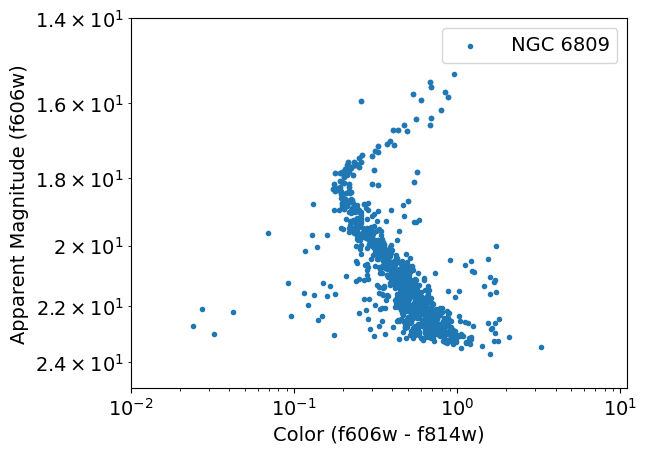

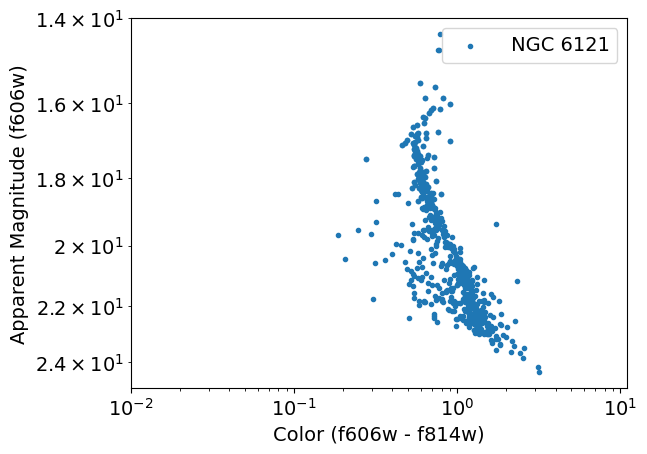

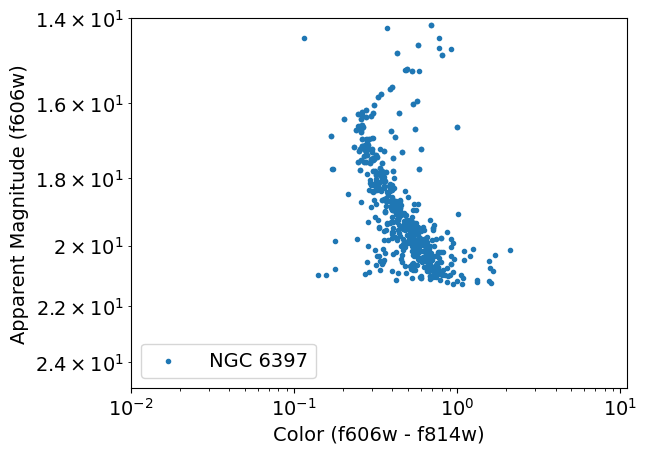

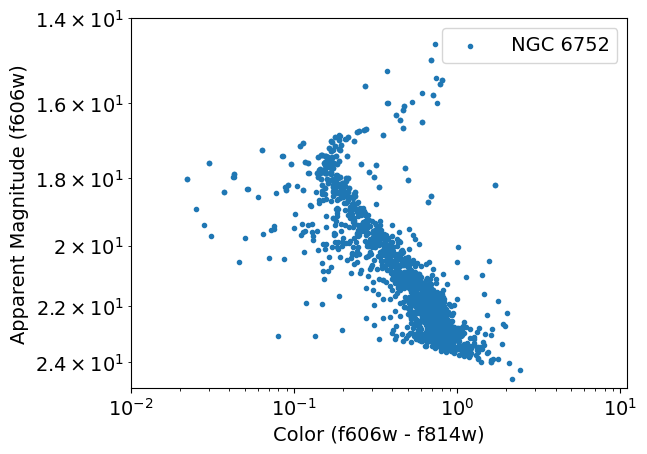

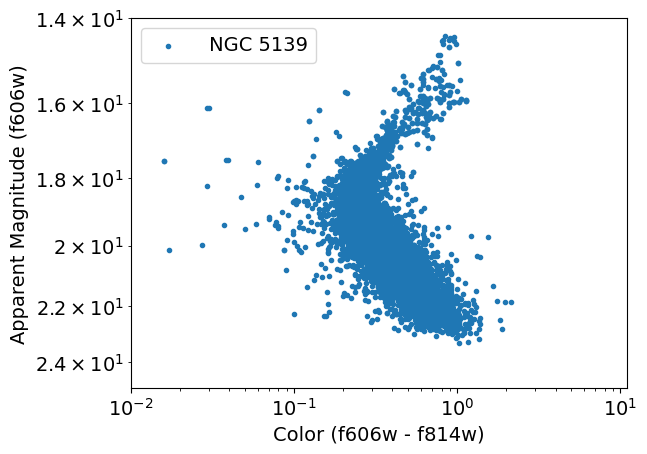

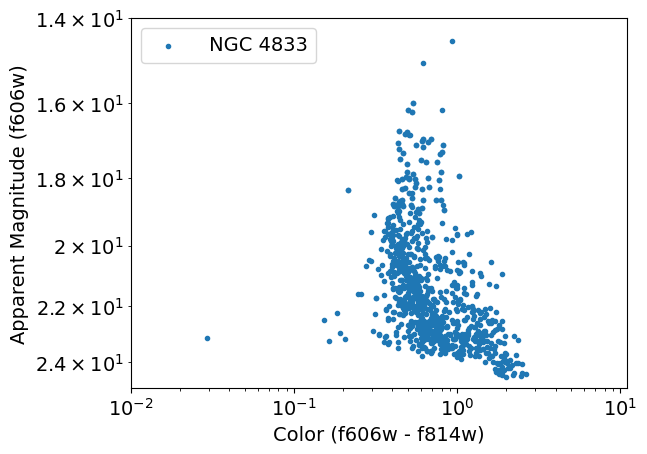

In [15]:
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    title = tbl.meta['comments'][12].split(':')[1].replace(' ', '')
    #print(len(tbl))
    plot_colormag(tbl, show=False)
    plt.savefig('/mnt/c/Users/panda/Documents/Stars/colormags/colormag_'+title+'.png', bbox_inches='tight', dpi=300)
    plt.show()

6. Select one of the clusters as your standard reference cluster – choose the one that has the  best determined and populated main sequence.

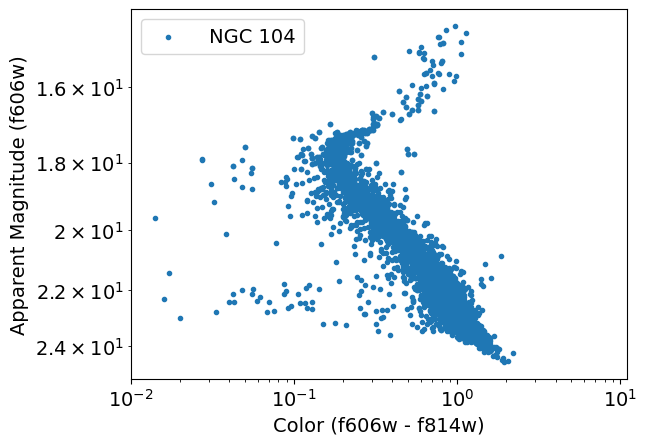

In [16]:
# NGC104
tbl_ref = Table(data=ascii.read(data_names[6]), names=column_names)
#plot_colormag(tbl_ref)
dist_ref = 4.45*u.kpc
dist_ref_err = 0.01*u.kpc

abscissa = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
ordinate = tbl_ref['f606w_TotMag']
plt.gca().invert_yaxis()
plt.scatter(abscissa, ordinate, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])

plt.xlabel('Color (f606w - f814w)')
plt.ylabel('Apparent Magnitude (f606w)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(left=0.01, right=11)
#plt.ylim(top=10, bottom=25)
plt.legend()

7. Assume all of the clusters have the same metallicity and reddening and determine the  (vertical) magnitude shift required to match the lower (unevolved) main sequences of all of  the other clusters to that of the reference cluster. Do this as quantitatively as you can. This  represents an approximate distance modulus difference between these clusters in the  F606W filter pass band, which is close to the ground-based Johnson V band. Determine an  error value for each distance modulus difference using a method that is as quantitative as  possible. If you are not able to measure a distance modulus difference for a given cluster,  please comment on the reason(s) for this.


The lower main sequence stars will have the highest magnitudes, as less luminous stars have higher magnitudes, and brighter stars have lower magnitudes.

In [17]:
def powerlaw_fit(x, a, k):
    return a*x**k

[0.01778211 0.00145169]


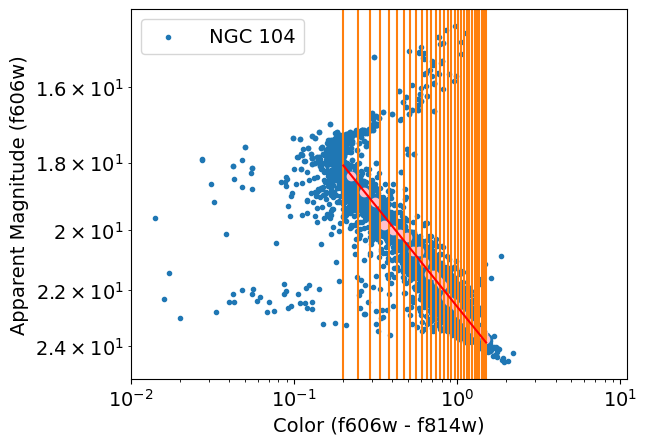

In [18]:
abscissa = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
ordinate = tbl_ref['f606w_TotMag']
plt.gca().invert_yaxis()
plt.scatter(abscissa, ordinate, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])

color_bins = np.linspace(0.2, 1.5, num=30)

ooo_lis = []
aaa_lis = []

for ii in range(len(color_bins)-1):
    con = ordinate[np.logical_and(np.greater(abscissa, color_bins[ii]), np.less(abscissa, color_bins[ii+1]))]
    ooo = np.mean(con)
    aaa = np.mean([color_bins[ii], color_bins[ii+1]])
    plt.scatter(aaa, ooo, color='pink')
    ooo_lis.append(ooo)
    aaa_lis.append(aaa)
    plt.axvline(color_bins[ii], color='tab:orange')
    if np.isfinite(ooo) and np.isfinite(aaa):
            ooo_lis.append(ooo)
            aaa_lis.append(aaa)
plt.axvline(color_bins[-1], color='tab:orange')
plt.xlabel('Color (f606w - f814w)')
plt.ylabel('Apparent Magnitude (f606w)')
plt.yscale('log')
plt.xscale('log')
plt.xlim(left=0.01, right=11)
#plt.ylim(top=10, bottom=25)
plt.legend()


fit, pcov = curve_fit(powerlaw_fit, aaa_lis, ooo_lis)
app = powerlaw_fit(color_bins, fit[0], fit[1])

plt.plot(color_bins, app, color='red')
perr = np.sqrt(np.diag(pcov))
print(perr)
title = tbl_ref.meta['comments'][12].split(':')[1].replace(' ', '')
plt.savefig('/mnt/c/Users/panda/Documents/Stars/exbins_'+title+'.png', bbox_inches='tight', dpi=300)

In [19]:
curve_fit(powerlaw_fit, aaa_lis, ooo_lis)

(array([22.5740302 ,  0.13777441]),
 array([[3.16203390e-04, 1.00598234e-05],
        [1.00598234e-05, 2.10740837e-06]]))

In [20]:
def fit_mains_sequence(tbl, show=True):
    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
    ordinate = tbl['f606w_TotMag']
    plt.gca().invert_yaxis()
    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])
    
    color_bins = np.linspace(0.2, 1.5, num=30)[:]
    #color_bins = np.linspace(-1.5, 0.5, num=20)
    
    aaa_lis = []
    ooo_lis = []
    ooo_sig = []
    
    for ii in range(len(color_bins)-1):
        con = ordinate[np.logical_and(np.greater(abscissa, color_bins[ii]), np.less(abscissa, color_bins[ii+1]))]
        ooo = np.mean(con)
        aaa = np.mean([color_bins[ii], color_bins[ii+1]])
        plt.scatter(aaa, ooo, color='pink')
        sig = np.std(con)
        if np.isfinite(ooo) and np.isfinite(aaa) and sig > 0:
            ooo_lis.append(ooo)
            aaa_lis.append(aaa)
            ooo_sig.append(sig)
    
    plt.xlabel('Color (f606w - f814w)')
    plt.ylabel('Apparent Magnitude (f606w)')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(left=0.01, right=11)
    plt.ylim(top=14, bottom=25)
    plt.legend()
    
    #print(ooo_sig)
    fit, pcov = curve_fit(powerlaw_fit, aaa_lis, ooo_lis, sigma=ooo_sig)
    app = powerlaw_fit(color_bins, fit[0], fit[1])
    perr = np.sqrt(np.diag(pcov))
    #print(powerlaw_fit(1.0, fit[0], fit[1]))
    
    plt.plot(color_bins, app, color='red')
    
    if show:
        plt.show()
    return fit, perr

/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: RuntimeWarning: Mean of empty slice.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 NGC 362
[23.41467173  0.05106688]
[0.07434226 0.01263842]


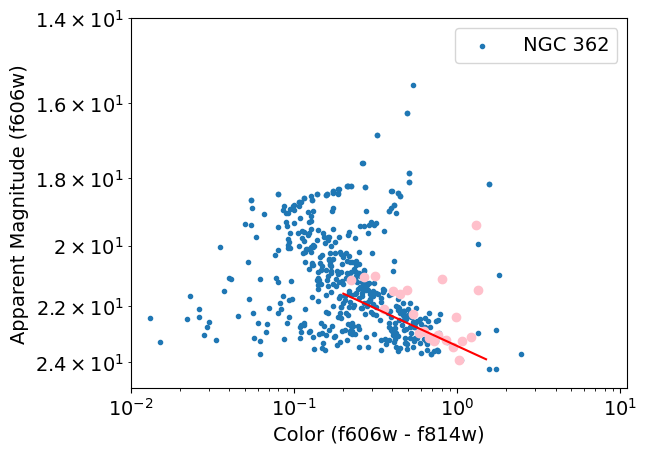

 NGC 6362
[22.17698158  0.04406948]
[0.08172314 0.01074793]


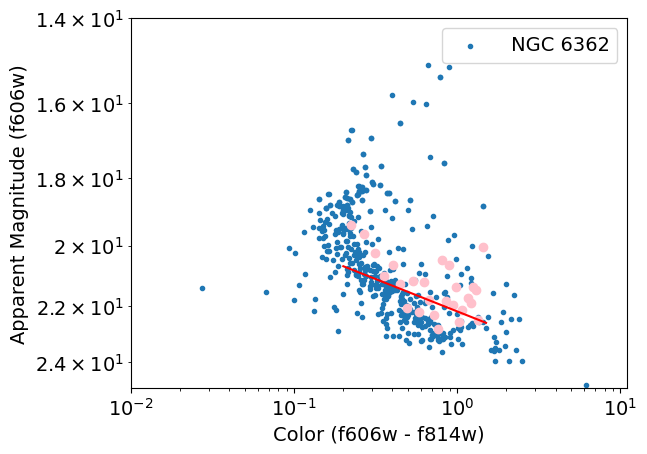

 NGC 6218
[22.59708506  0.06526307]
[0.08805672 0.00815588]


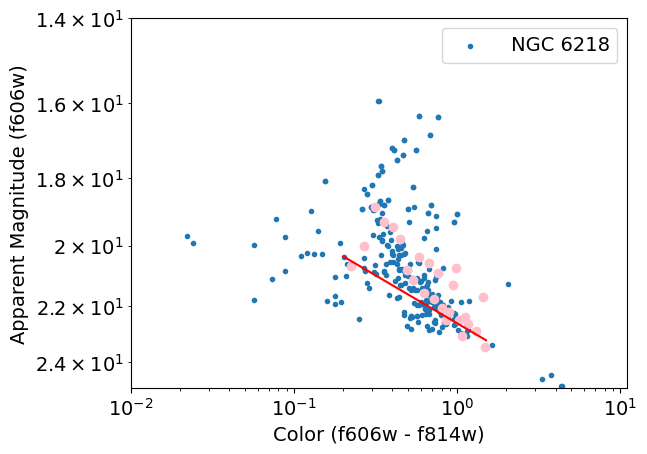

 NGC 6838
[22.15319068  0.07772031]
[0.15827766 0.01181475]


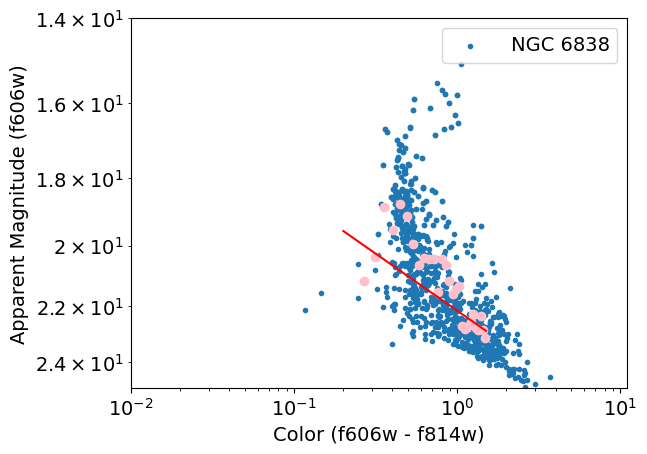

 NGC 3201
[22.64596412  0.08543081]
[0.09179309 0.00708827]


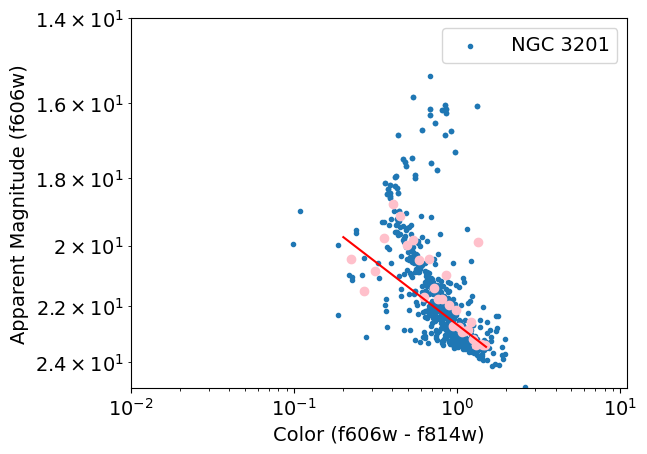

 NGC 6656
[22.20674223  0.11339436]
[0.08480847 0.00983913]


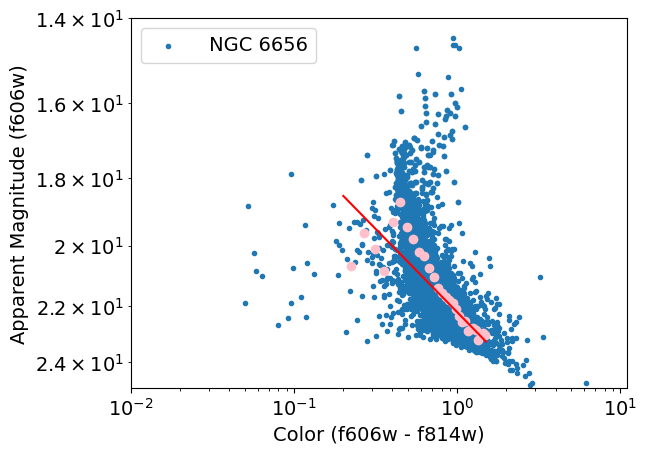

 NGC 104
[22.6074001   0.13598151]
[0.01876129 0.00207897]


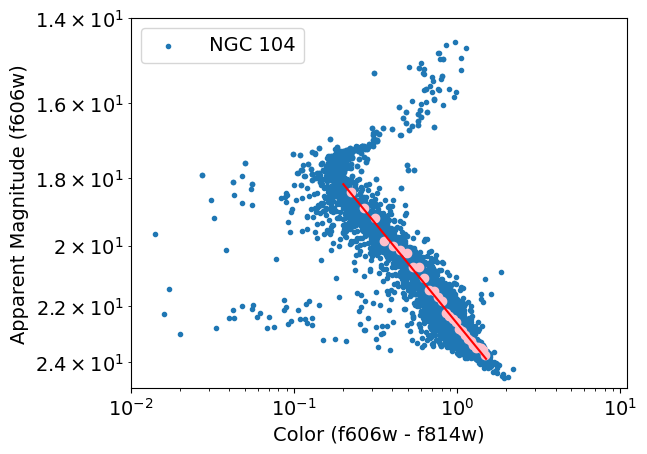

 NGC 6254
[22.14100061  0.0759166 ]
[0.04694438 0.00668601]


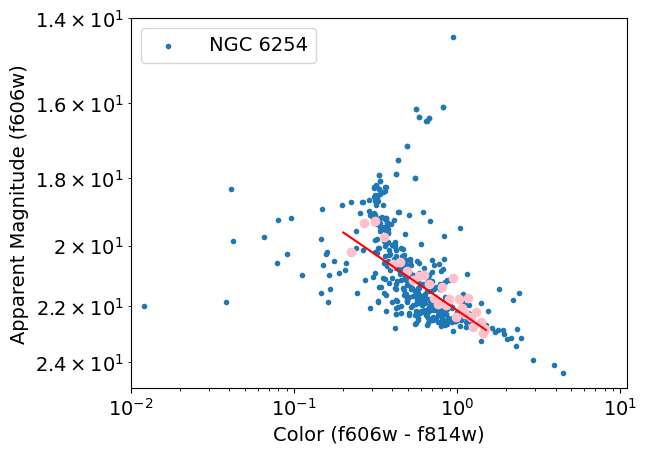

 NGC 6809
[22.832391    0.09818289]
[0.0337963  0.01113869]


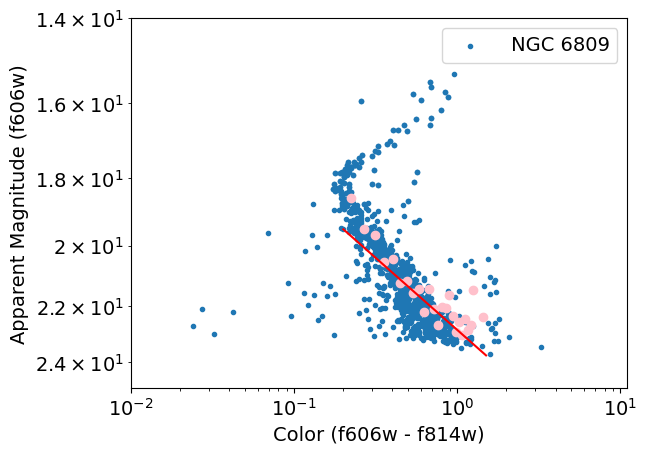

 NGC 6121
[21.2457266  0.1471234]
[0.10360722 0.0139396 ]


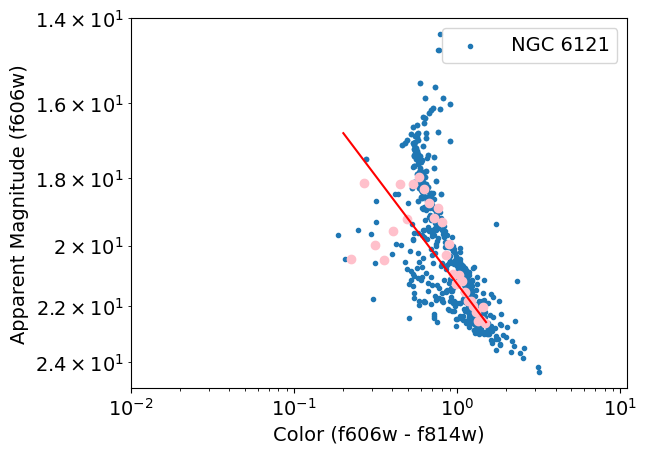

 NGC 6397
[20.55438706  0.10529301]
[0.06561162 0.01196348]


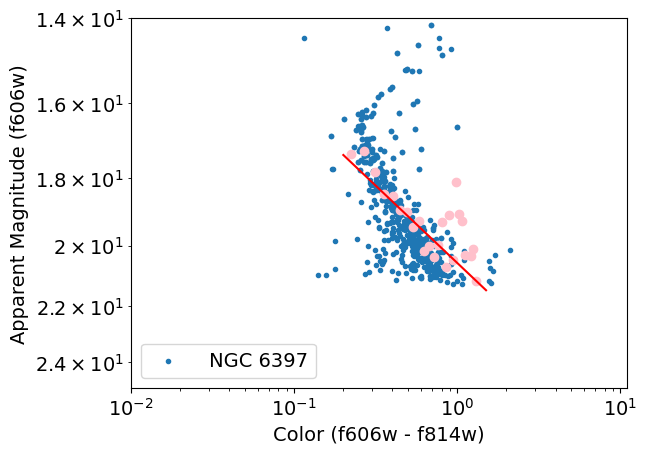

 NGC 6752
[22.83609635  0.09867917]
[0.06696742 0.01112868]


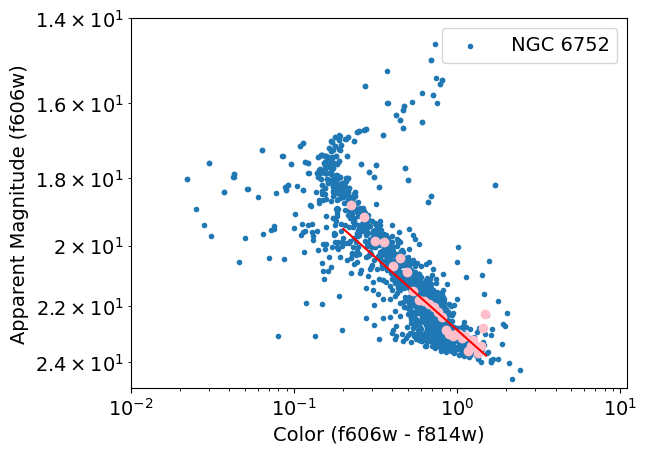

 NGC 5139
[21.89536199  0.09771466]
[0.06535761 0.00640575]


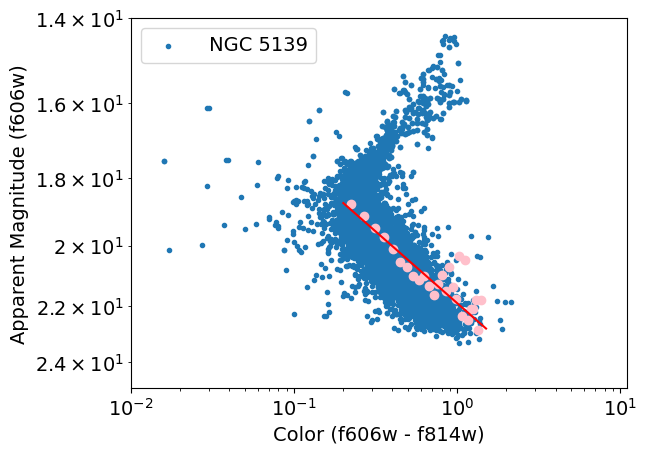

 NGC 4833
[22.47747565  0.06542103]
[0.07727311 0.0068531 ]


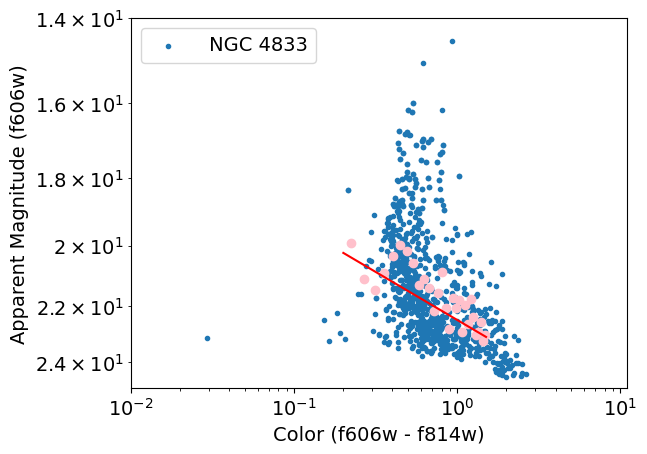

In [21]:
mods_fit = []
mods_fit_err = []

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    fit, perr = fit_mains_sequence(tbl, show=False)
    print(tbl.meta['comments'][12].split(':')[1])
    print(fit)
    print(perr)
    mods_fit.append(fit[0])
    mods_fit_err.append(perr[0])
    title = tbl.meta['comments'][12].split(':')[1].replace(' ', '')
    plt.savefig('/mnt/c/Users/panda/Documents/Stars/sequencefits/seqfit_'+title+'.png', bbox_inches='tight', dpi=300)
    plt.show()

In [22]:
mods_diff = np.zeros(len(data_names))
mods_diff_err = np.zeros(len(data_names))

print('Reference Cluster NGC 104')
print(mods_fit[6], mods_fit_err[6]) # NGC 104
mods_fit_ref = mods_fit[6]
mods_fit_err_ref = mods_fit_err[6]

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    
    mods_diff[dat] = mods_fit_ref - mods_fit[dat]
    mods_diff_err[dat] = np.sqrt(mods_fit_err_ref**2 + mods_fit_err[dat]**2)
    print(mods_diff[dat], mods_diff_err[dat])

Reference Cluster NGC 104
22.607400100912656 0.018761287945727415
 NGC 362
-0.8072716322061808 0.07667305463520756
 NGC 6362
0.43041851602669823 0.08384901211799807
 NGC 6218
0.010315039334130915 0.09003317225700472
 NGC 6838
0.4542094165906825 0.159385703927865
 NGC 3201
-0.0385640161282268 0.0936907506775934
 NGC 6656
0.4006578668400742 0.08685886258675947
 NGC 104
0.0 0.02653246786043457
 NGC 6254
0.4663994884988192 0.05055453428579899
 NGC 6809
-0.2249908955934785 0.03865456683883038
 NGC 6121
1.3616734994836115 0.10529217311757996
 NGC 6397
2.0530130409381186 0.06824127111338073
 NGC 6752
-0.22869625299622598 0.06954581957657935
 NGC 5139
0.7120381152218087 0.06799708138580525
 NGC 4833
0.12992445348822557 0.07951804555904934


In [23]:

#for dat in range(len(data_names)):
#    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
#    print(tbl.meta['comments'][12].split(':')[1])
#    
#    abscissa = tbl['f606w_TotMag'] - tbl['f814w_TotMag']
#    ordinate = tbl['f606w_TotMag']
#    shifted_ord = ordinate-mods_diff[dat]
#
#    plt.gca().invert_yaxis()
#    plt.scatter(abscissa, ordinate, marker='.', label=tbl.meta['comments'][12].split(':')[1])
#    #plt.scatter(abscissa, shifted_ord, marker='.', label=tbl.meta['comments'][12].split(':')[1]+' shifted', color='red')
#    plt.legend
#    plt.xscale('log')
#    plt.yscale('log')
#    
#    abs_ref = tbl_ref['f606w_TotMag'] - tbl_ref['f814w_TotMag']
#    ord_ref = tbl_ref['f606w_TotMag']
#    #plt.scatter(abs_ref, ord_ref, marker='.', label=tbl_ref.meta['comments'][12].split(':')[1])
#    
#    for gg in color_bins:
#        plt.axvline(gg, color='red')
#    
#    #plot_colormag(tbl_ref, show=False)
#    plt.legend()
#   
#    plt.show()

8. Go to the following web site and look-up the apparent distance modulus of your standard  reference cluster in the V-band. http://physwww.mcmaster.ca/%7Eharris/mwgc.dat 

In [24]:
# (m-M)V
modulus_apparent_NGC104 = 13.37
modulus_apparent_NGC104

13.37

In [25]:
dist_canon_NGC104 = 4.5*u.kpc # Reference Cluster
dist_canon_NGC104

<Quantity 4.5 kpc>

9. Use this apparent distance modulus to compute the distance moduli of all of the other  clusters in your dataset using the offsets determined in point 7 above. 

In [26]:
mods_calc = np.zeros(len(data_names))

for dat in range(len(data_names)):
    tbl = Table(data=ascii.read(data_names[dat]), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    #mA = magshift(tbl_ref)[1]#tbl_ref['f606w_TotMag']
    #mB = magshift(tbl)[1]#tbl['f606w_TotMag']
    dist_modulus = mods_diff[dat] #mA - mB
    print(dist_modulus)
    mod = modulus_apparent_NGC104 - dist_modulus
    print(mod)
    print()
    mods_calc[dat] = modulus_apparent_NGC104 - dist_modulus

 NGC 362
-0.8072716322061808
14.17727163220618

 NGC 6362
0.43041851602669823
12.939581483973301

 NGC 6218
0.010315039334130915
13.359684960665868

 NGC 6838
0.4542094165906825
12.915790583409317

 NGC 3201
-0.0385640161282268
13.408564016128226

 NGC 6656
0.4006578668400742
12.969342133159925

 NGC 104
0.0
13.37

 NGC 6254
0.4663994884988192
12.90360051150118

 NGC 6809
-0.2249908955934785
13.594990895593478

 NGC 6121
1.3616734994836115
12.008326500516388

 NGC 6397
2.0530130409381186
11.31698695906188

 NGC 6752
-0.22869625299622598
13.598696252996225

 NGC 5139
0.7120381152218087
12.65796188477819

 NGC 4833
0.12992445348822557
13.240075546511774



10. Compare your apparent distance moduli for each cluster with those available at http://physwww.mcmaster.ca/%7Eharris/mwgc.dat. Make a plot illustrating this comparison.  Calculate statistics of your choice to provide a quantitative comparison of the distance  moduli. Comment on how well you did in your distance determinations.  

In [27]:
f = open('mwgc.dat.txt')
#print(f.read())
#f.readlines()

for line in f.readlines():
    if line.strip().startswith('ID'):
        print(line)
    if line.strip().startswith('NGC 4833'):
        print(line)
f.close()

   ID        Name           RA   (2000)   DEC         L       B     R_Sun  R_gc    X     Y     Z

 NGC 4833                12 59 33.92  -70 52 35.4   303.60   -8.02    6.6   7.0   3.6  -5.4  -0.9

   ID       [Fe/H] wt  E(B-V) V_HB (m-M)V V_t   M_V,t   U-B   B-V   V-R   V-I  spt   ellip

 NGC 4833    -1.85  4   0.32 15.60 15.08  6.91  -8.17   0.29  0.93  0.63  1.33  F3    0.07

    ID         v_r   +/-    v_LSR    sig_v  +/-    c        r_c   r_h    mu_V   rho_0 lg(tc) lg(th)

 NGC 4833     200.2   1.2   192.9                 1.25      1.00  2.41   18.48   3.00   8.78  9.42



In [28]:
modulus_canon_NGC362  = 14.83
modulus_canon_NGC6362 = 14.68
modulus_canon_NGC6218 = 14.01
modulus_canon_NGC6838 = 13.80
modulus_canon_NGC3201 = 14.20
modulus_canon_NGC6656 = 13.60
modulus_canon_NGC104  = 13.37
modulus_canon_NGC6254 = 14.08
modulus_canon_NGC6809 = 13.89
modulus_canon_NGC6121 = 12.82
modulus_canon_NGC6397 = 12.37
modulus_canon_NGC6752 = 13.13
modulus_canon_NGC5139 = 13.94
modulus_canon_NGC6838 = 13.80
modulus_canon_NGC4833 = 15.08

mods_canon = [
    modulus_canon_NGC362 ,
    modulus_canon_NGC6362,
    modulus_canon_NGC6218,
    modulus_canon_NGC6838,
    modulus_canon_NGC3201,
    modulus_canon_NGC6656,
    modulus_canon_NGC104 ,
    modulus_canon_NGC6254,
    modulus_canon_NGC6809,
    modulus_canon_NGC6121,
    modulus_canon_NGC6397,
    modulus_canon_NGC6752,
    modulus_canon_NGC5139,
    #modulus_canon_NGC6838,
    modulus_canon_NGC4833
]

In [29]:
ii = 0
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    print('Accepted Distance Modulus:', mods_canon[ii])
    print('Calculated Distance Modulus:', mods_calc[ii])
    perc = 100*np.abs(mods_canon[ii]-mods_calc[ii])/mods_canon[ii]
    print('Percent Error:', perc)
    print()
    
    ii+=1

 NGC 362
Accepted Distance Modulus: 14.83
Calculated Distance Modulus: 14.17727163220618
Percent Error: 4.401405042439785

 NGC 6362
Accepted Distance Modulus: 14.68
Calculated Distance Modulus: 12.939581483973301
Percent Error: 11.855711962034734

 NGC 6218
Accepted Distance Modulus: 14.01
Calculated Distance Modulus: 13.359684960665868
Percent Error: 4.6417918582022235

 NGC 6838
Accepted Distance Modulus: 13.8
Calculated Distance Modulus: 12.915790583409317
Percent Error: 6.407314612975971

 NGC 3201
Accepted Distance Modulus: 14.2
Calculated Distance Modulus: 13.408564016128226
Percent Error: 5.573492844167418

 NGC 6656
Accepted Distance Modulus: 13.6
Calculated Distance Modulus: 12.969342133159925
Percent Error: 4.63719019735349

 NGC 104
Accepted Distance Modulus: 13.37
Calculated Distance Modulus: 13.37
Percent Error: 0.0

 NGC 6254
Accepted Distance Modulus: 14.08
Calculated Distance Modulus: 12.90360051150118
Percent Error: 8.355110003542755

 NGC 6809
Accepted Distance Modul

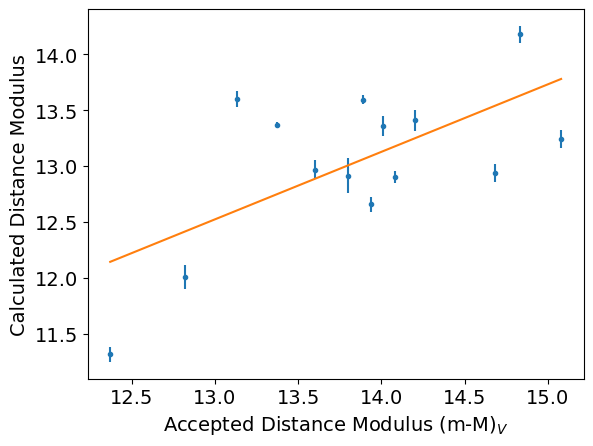

In [30]:
plt.errorbar(mods_canon, mods_calc, yerr=mods_diff_err, fmt='.')
fit_lin = curve_fit(lin_fit, mods_canon, mods_calc)[0]
plt.plot(np.linspace(np.min(mods_canon), np.max(mods_canon)), lin_fit(np.linspace(np.min(mods_canon), np.max(mods_canon)), fit_lin[0], fit_lin[1]))
plt.xlabel('Accepted Distance Modulus (m-M)$_V$')
plt.ylabel('Calculated Distance Modulus')
plt.savefig('/mnt/c/Users/panda/Documents/Stars/distance_modulus.png', bbox_inches='tight', dpi=300)

In [31]:
fit_lin

array([0.60358736, 4.67754595])

Text(0, 0.5, 'Calculated Distance Modulus')

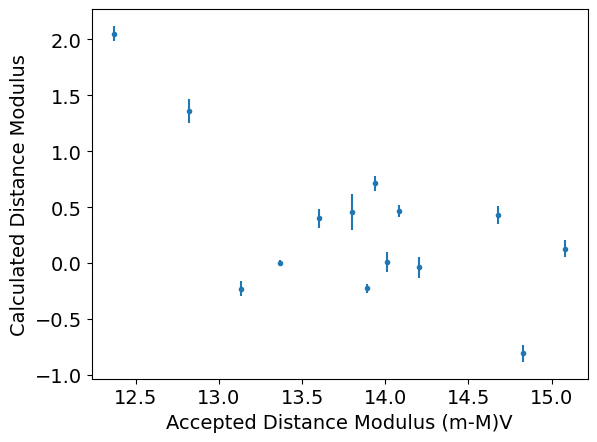

In [32]:
plt.errorbar(mods_canon, np.subtract(modulus_apparent_NGC104, mods_calc), yerr=mods_diff_err, fmt='.')
plt.xlabel('Accepted Distance Modulus (m-M)V')
plt.ylabel('Calculated Distance Modulus')

$\textbf{Comment on how well you did in your distance determinations.}$

Given the percent error values calculated, the distance moduli found are reasonable for most of the clusters. Since the fit to the main sequences of the clusters did not always perfectly match up with the main sequence, some larger errors are expected, but overall they are pretty good. Maybe some of the errors are larger due to the effects of reddening. 

11. Does the difference between your distance moduli and the actual values correlate with  some other cluster parameter such as metallicity or reddening? Plot your distance moduli  differences against the reddening for each cluster. What kind of overall behavior do you  see? How do you interpret this behavior?

In [33]:
cluster_names = []
for dat in data_names:
    tbl = Table(data=ascii.read(dat), names=column_names)
    print(tbl.meta['comments'][12].split(':')[1])
    cluster_names.append(tbl.meta['comments'][12].split(':')[1].strip())

 NGC 362
 NGC 6362
 NGC 6218
 NGC 6838
 NGC 3201
 NGC 6656
 NGC 104
 NGC 6254
 NGC 6809
 NGC 6121
 NGC 6397
 NGC 6752
 NGC 5139
 NGC 4833


In [34]:
# Foreground Reddening E(B-V)
f = open('mwgc.dat.txt')
#print(f.read())
#f.readlines()

for line in f.readlines():
    if line.strip().startswith('ID'):
        print(line)
    for name in cluster_names:
        if line.strip().startswith(name):
            print(line)
    #if line.strip().startswith('NGC 4833'):
     #   print(line)
f.close()

   ID        Name           RA   (2000)   DEC         L       B     R_Sun  R_gc    X     Y     Z

 NGC 104    47 Tuc       00 24 05.67  -72 04 52.6   305.89  -44.89    4.5   7.4   1.9  -2.6  -3.1

 NGC 362                 01 03 14.26  -70 50 55.6   301.53  -46.25    8.6   9.4   3.1  -5.1  -6.2

 NGC 3201                10 17 36.82  -46 24 44.9   277.23    8.64    4.9   8.8   0.6  -4.8   0.7

 NGC 4833                12 59 33.92  -70 52 35.4   303.60   -8.02    6.6   7.0   3.6  -5.4  -0.9

 NGC 5139   omega Cen    13 26 47.24  -47 28 46.5   309.10   14.97    5.2   6.4   3.1  -3.9   1.3

 NGC 6121   M 4          16 23 35.22  -26 31 32.7   350.97   15.97    2.2   5.9   2.1  -0.3   0.6

 NGC 6218   M 12         16 47 14.18  -01 56 54.7    15.72   26.31    4.8   4.5   4.2   1.2   2.1

 NGC 6254   M 10         16 57 09.05  -04 06 01.1    15.14   23.08    4.4   4.6   3.9   1.1   1.7

 NGC 6362                17 31 54.99  -67 02 54.0   325.55  -17.57    7.6   5.1   6.0  -4.1  -2.3

 NGC 6397  

In [35]:
#dist_canon_NGC104
dist_canon_NGC104  = 4.5*u.kpc
dist_canon_NGC362  = 8.6*u.kpc
dist_canon_NGC3201 = 4.9*u.kpc
dist_canon_NGC4833 = 6.6*u.kpc
dist_canon_NGC5139 = 5.2*u.kpc
dist_canon_NGC6121 = 2.2*u.kpc
dist_canon_NGC6218 = 4.8*u.kpc
dist_canon_NGC6254 = 4.4*u.kpc
dist_canon_NGC6362 = 7.6*u.kpc
dist_canon_NGC6397 = 2.3*u.kpc
dist_canon_NGC6656 = 3.2*u.kpc
dist_canon_NGC6752 = 4.0*u.kpc
dist_canon_NGC6809 = 5.4*u.kpc
dist_canon_NGC6838 = 4.0*u.kpc

distances_canon = [
                    dist_canon_NGC362 ,
                    dist_canon_NGC6362,
                    dist_canon_NGC6218,
                    dist_canon_NGC6838,
                    dist_canon_NGC3201,
                    dist_canon_NGC6656,
                    dist_canon_NGC104 ,
                    dist_canon_NGC6254,
                    dist_canon_NGC6809,
                    dist_canon_NGC6121,
                    dist_canon_NGC6397,
                    dist_canon_NGC6752,
                    dist_canon_NGC5139,
                    dist_canon_NGC4833
                    ]

In [36]:
#   ID       [Fe/H] 
metal_NGC104  = -0.72 
metal_NGC362  = -1.26 
metal_NGC3201 = -1.59 
metal_NGC4833 = -1.85 
metal_NGC5139 = -1.53 
metal_NGC6121 = -1.16 
metal_NGC6218 = -1.37 
metal_NGC6254 = -1.56 
metal_NGC6362 = -0.99 
metal_NGC6397 = -2.02 
metal_NGC6656 = -1.70 
metal_NGC6752 = -1.54 
metal_NGC6809 = -1.94 
metal_NGC6838 = -0.78 

metallicity_canon = [
                    metal_NGC362 ,
                    metal_NGC6362,
                    metal_NGC6218,
                    metal_NGC6838,
                    metal_NGC3201,
                    metal_NGC6656,
                    metal_NGC104 ,
                    metal_NGC6254,
                    metal_NGC6809,
                    metal_NGC6121,
                    metal_NGC6397,
                    metal_NGC6752,
                    metal_NGC5139,
                    metal_NGC4833
                    ]

In [37]:
#  ID     E(B-V)
red_NGC104  = 0.04
red_NGC362  = 0.05
red_NGC3201 = 0.24
red_NGC4833 = 0.32
red_NGC5139 = 0.12
red_NGC6121 = 0.35
red_NGC6218 = 0.19
red_NGC6254 = 0.28
red_NGC6362 = 0.09
red_NGC6397 = 0.18
red_NGC6656 = 0.34
red_NGC6752 = 0.04
red_NGC6809 = 0.08
red_NGC6838 = 0.25

reddening_canon = [
                    red_NGC362 ,
                    red_NGC6362,
                    red_NGC6218,
                    red_NGC6838,
                    red_NGC3201,
                    red_NGC6656,
                    red_NGC104 ,
                    red_NGC6254,
                    red_NGC6809,
                    red_NGC6121,
                    red_NGC6397,
                    red_NGC6752,
                    red_NGC5139,
                    #red_NGC6838,
                    red_NGC4833
                    ]

Slope: -0.30148776220808093


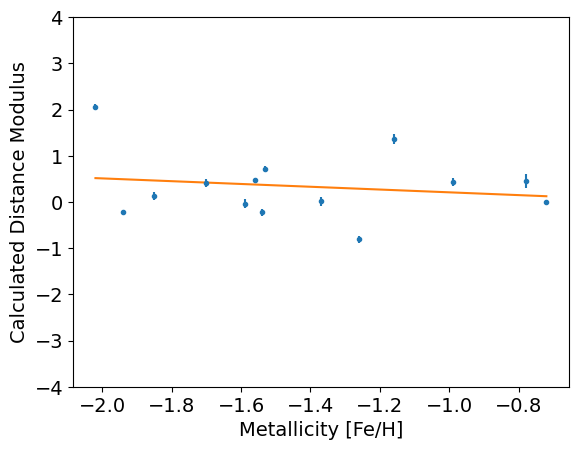

In [38]:
plt.errorbar(metallicity_canon, mods_diff, yerr=mods_diff_err, fmt='.')
fit_lin = curve_fit(lin_fit, metallicity_canon, mods_diff)[0]
plt.plot(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), lin_fit(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), fit_lin[0], fit_lin[1]))
plt.ylim(bottom=-4, top=4)
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Calculated Distance Modulus')
print('Slope:', fit_lin[0])
plt.savefig('/mnt/c/Users/panda/Documents/Stars/modulus_metallicity.png', bbox_inches='tight', dpi=300)

$\textbf{What kind of overall behavior do you  see? How do you interpret this behavior?}$

There is no relationship between the distance modulus and the metallicity. The metallicity of the clusters do not seem to affect the distance modulus of the clusters.

Slope: 2.6488211865612348


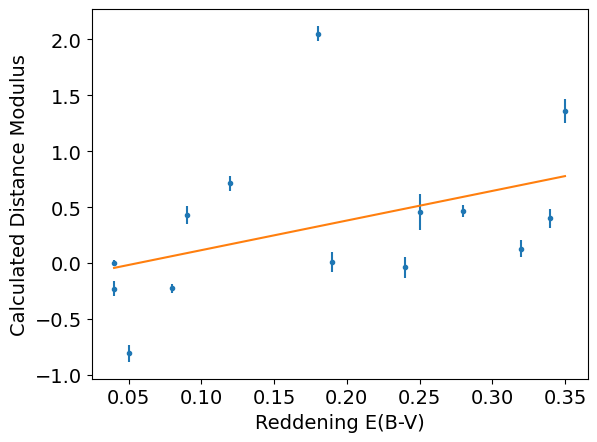

In [39]:
plt.errorbar(reddening_canon, mods_diff, yerr=mods_diff_err, fmt='.')
fit_lin = curve_fit(lin_fit, reddening_canon, mods_diff)[0]
plt.plot(np.linspace(np.min(reddening_canon), np.max(reddening_canon)), lin_fit(np.linspace(np.min(reddening_canon), np.max(reddening_canon)), fit_lin[0], fit_lin[1]))
#plt.ylim(bottom=-4, top=4)
plt.xlabel('Reddening E(B-V)')
plt.ylabel('Calculated Distance Modulus')
#plt.xlim(left=np.min(reddening_canon), right=np.max(reddening_canon))
print('Slope:', fit_lin[0])
plt.savefig('/mnt/c/Users/panda/Documents/Stars/modulus_reddening.png', bbox_inches='tight', dpi=300)

$\textbf{What kind of overall behavior do you  see? How do you interpret this behavior?}$

There is a positive relationship between the reddening and the calculated distance modulus. As reddening increases, the distance modulus also increases. This implies that the redder the cluster, the further away it seems.

In [40]:
fit_lin

array([ 2.64882119, -0.14916741])

## Part 2: Globular Cluster Isochrones Fitting and Age Determination

Go to the website that has the Dartmouth Stellar Evolution Models http://stellar.dartmouth.edu/models/isolf_new.html.

1.  Download the appropriate isochrones at different ages to produce a CMD fit to each of  the globular clusters from Part I to determine their ages. Make sure to choose the  appropriate [Fe/H] metallicity for each cluster from the literature or Simbad, as well as  the colors from HST/WFPC2. You can choose the Helium abundance ratio to be Y=0.33  and [$\alpha$/Fe]=+0.20. Make sure to construct the axes properly and to join the points with a  line.  
Chose Y=0.245+1.5*Z and [$\alpha$/Fe]=+0.20

Text(0.5, 1.0, 'Y: 0.2519 [Fe/H]: -0.72 [a/Fe]: 0.20')

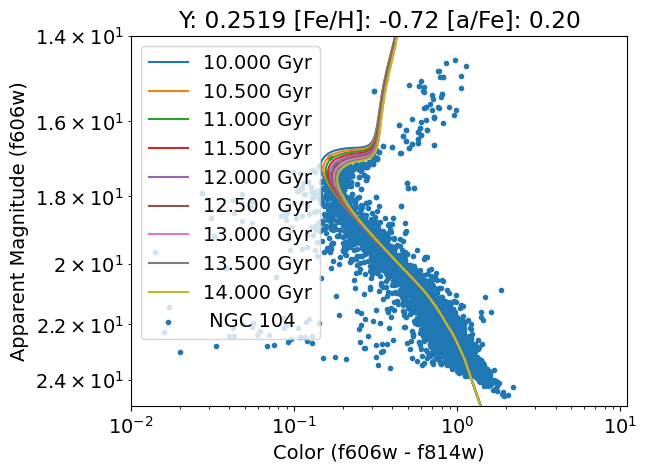

In [41]:
# 'F814W;F606W'

## For NGC 104
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC104/tmp1670725478.iso')
col_names = data=ascii.read(data_iso[0]).meta['comments'][8].split()
tbl = Table(data=ascii.read(data_iso[0]), names=col_names)

mark = ascii.read(data_iso[0]).meta['comments'][2].split()
vals = ascii.read(data_iso[0]).meta['comments'][3].split()

ii = 0
for line in (ascii.read(data_iso[0]).meta['comments']):
    if line.startswith('AGE'):
        eeps = int(line.split('=')[2])
        iso = tbl[ii:ii+eeps]
        
        v_band = iso['F606W'] - 0.044 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + 3.1*(1)*red_NGC104
        i_band = iso['F814W'] + 0.309 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + 3.1*(0.482)*red_NGC104
        
        color = v_band - i_band
        
        # m - M = 5 log_10(d) - 5
        # m = M + 5 log_10(d) - 5
        #A_red = 3.1*(1)*red_NGC104
        #mag = iso['F606W'] - 0.044 + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + A_red
        #iso['F606W'] + 5*np.log10(dist_canon_NGC104.to(u.pc).value) - 5 + A_red
        age = line.split('=')[1].split()[0] + ' Gyr'
        plt.plot(color, v_band, label=age)
        plt.yscale('log')
        plt.xscale('log')
        
        ii += eeps
        #plt.show()
        #print(eeps)
tblr = Table(data=ascii.read(data_names[6]), names=column_names)
plot_colormag(tbl=tblr, show=False)
plt.title(mark[1] + ': ' + vals[1] + ' ' + mark[4] + ': ' + vals[4] + ' ' + mark[5] + ': ' + vals[5])

#tbl[276:276+268]

In [42]:
#int(ascii.read('/mnt/c/Users/panda/Documents/Stars/isochrone_data/tmp1670449043.iso').meta['comments'][9].split()[2].split('=')[1])

In [43]:
def residual(iso_color, iso_magni, dat_color, dat_magni):
    inter = interp1d(iso_magni, iso_color, fill_value="extrapolate")
    R = (dat_color - inter(dat_magni))**2
    #np.sqrt(np.power(dat_color, 2) - np.power(inter(dat_magni), 2))
    #for pp in range(len(dat_magni)):
    #    resid = dat_color[pp] - inter(dat_magni[pp])
    #    R += resid
    return np.sum(R)

In [44]:
def fit_isochrone(data_iso, tbl_data, reddening, distance): 
    col_names = data=ascii.read(data_iso[0]).meta['comments'][8].split()
    tbl = Table(data=ascii.read(data_iso[0]), names=col_names)
    
    dat_colors = tbl_data['f606w_TotMag'] - tbl_data['f814w_TotMag']
    dat_magnis = tbl_data['f606w_TotMag']
    
    mark = ascii.read(data_iso[0]).meta['comments'][2].split()
    vals = ascii.read(data_iso[0]).meta['comments'][3].split()
    
    ii = 0
    for line in (ascii.read(data_iso[0]).meta['comments']):
        if line.startswith('AGE'):
            eeps = int(line.split('=')[2])
            iso = tbl[ii:ii+eeps]
            
            v_band = iso['F606W'] - 0.044 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(1)*reddening
            i_band = iso['F814W'] + 0.309 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(0.482)*reddening
            
            color = v_band - i_band
            
            iso_colors = color
            iso_magnis = v_band
    
            age = line.split('=')[1].split()[0] + ' Gyr'
            plt.plot(color, v_band, label=age)
            plt.yscale('log')
            plt.xscale('log')
            
            R = residual(iso_colors, iso_magnis, dat_colors, dat_magnis)
            print(age, ':', R)
            
            ii += eeps
    
    plt.title(mark[1] + ': ' + vals[1] + ' ' + mark[4] + ': ' + vals[4] + ' ' + mark[5] + ': ' + vals[5])
    return float(vals[1])

In [45]:
cluster_names

['NGC 362',
 'NGC 6362',
 'NGC 6218',
 'NGC 6838',
 'NGC 3201',
 'NGC 6656',
 'NGC 104',
 'NGC 6254',
 'NGC 6809',
 'NGC 6121',
 'NGC 6397',
 'NGC 6752',
 'NGC 5139',
 'NGC 4833']

In [46]:
## NGC 362
metal_NGC362

-1.26

9.500 Gyr : 4814477.721747678
10.000 Gyr : 4731159.0976428045
10.500 Gyr : 4765755.394018637
11.000 Gyr : 4950304.473270862
11.500 Gyr : 4973622.7983652875
12.000 Gyr : 4941095.295518402


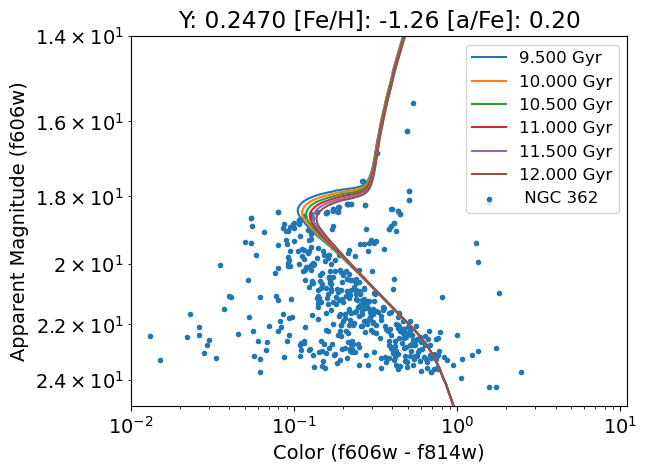

In [47]:
## NGC 362
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC362/tmp1670737320.iso')
reddening = red_NGC362
distance = dist_canon_NGC362
tblr = Table(data=ascii.read(data_names[0]), names=column_names)
y_NGC362 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC362 = 10 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)

In [48]:
## NGC 6362
metal_NGC6362

-0.99

10.000 Gyr : 1040738.9300821543
10.500 Gyr : 1040738.1669741154
11.000 Gyr : 1040736.7927928141
11.500 Gyr : 1040735.8595317721
12.000 Gyr : 1040734.9324884298
12.500 Gyr : 1040733.8969465856
13.000 Gyr : 1040732.9561695302
13.500 Gyr : 1040731.9097863066
14.000 Gyr : 1040731.1452387345
14.500 Gyr : 1040730.1967664298
15.000 Gyr : 1040729.2813144962


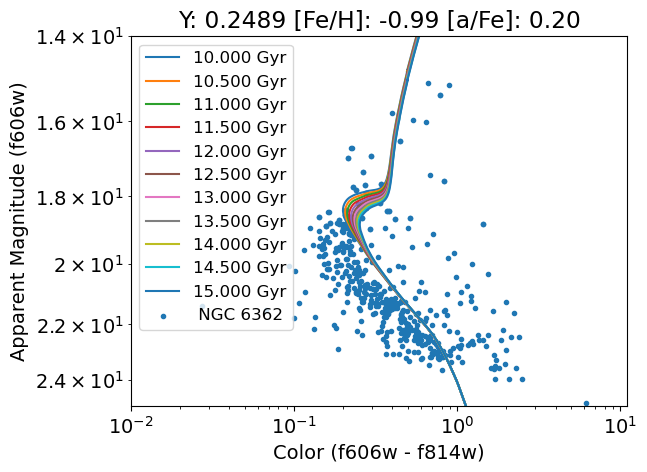

In [49]:
## NGC 6362
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6362/tmp1670624916.iso')
reddening = red_NGC6362
distance = dist_canon_NGC6362
tblr = Table(data=ascii.read(data_names[1]), names=column_names)
y_NGC6362 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6362 = 14.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [50]:
## NGC 6218
metal_NGC6218

-1.37

10.000 Gyr : 40776885.809651814
10.500 Gyr : 40927977.029599175
11.000 Gyr : 40951965.475736395
11.500 Gyr : 41285080.90584169
12.000 Gyr : 41093027.75944834
12.500 Gyr : 41227921.26808636
13.000 Gyr : 41268125.09270294
13.500 Gyr : 41318980.48798732
14.000 Gyr : 41378238.637266815
14.500 Gyr : 41341154.186476395
15.000 Gyr : 41987997.21648977


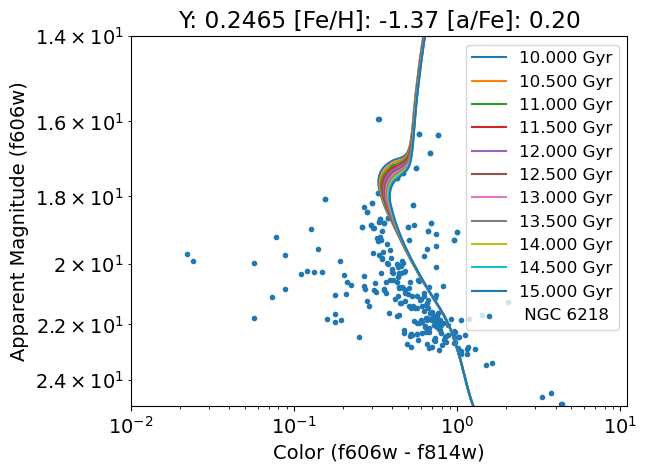

In [51]:
## NGC 6218
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6218/tmp1670625108.iso')
reddening = red_NGC6218
distance = dist_canon_NGC6218
tblr = Table(data=ascii.read(data_names[2]), names=column_names)
y_NGC6218 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6218 = 10.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)

In [52]:
## NGC 6838
metal_NGC6838

-0.78

8.000 Gyr : 536928195.2133114
8.500 Gyr : 14523164234.991821
9.000 Gyr : 1003762987.9338676
9.500 Gyr : 2037425529.5385275
10.000 Gyr : 243152507067.15314
10.500 Gyr : 818894444.720537
11.000 Gyr : 1531717885.2770002
11.500 Gyr : inf
12.000 Gyr : 614519480.4213252


/home/savannahgramze/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


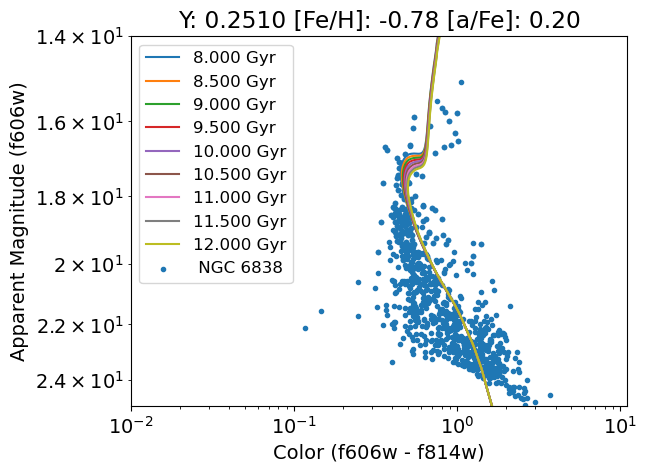

In [53]:
## NGC 6838
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6838/tmp1670625302.iso')
reddening = red_NGC6838
distance = dist_canon_NGC6838
tblr = Table(data=ascii.read(data_names[3]), names=column_names)
y_NGC6838 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6838 = 8.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [54]:
## NGC 3201
metal_NGC3201

-1.59

10.000 Gyr : 1039725.8411334553
10.500 Gyr : 1039724.7933318553
11.000 Gyr : 1039724.1485766625
11.500 Gyr : 1039723.2449122883
12.000 Gyr : 1039722.3680202261
12.500 Gyr : 1039721.6867781422
13.000 Gyr : 1039720.8309635859
13.500 Gyr : 1039719.9675846009
14.000 Gyr : 1039719.291287324


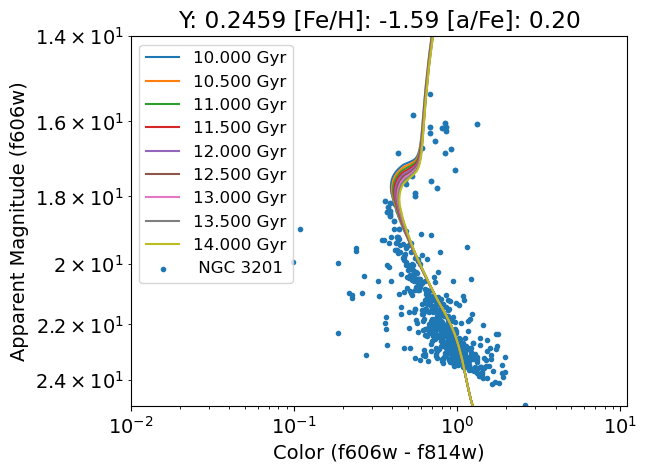

In [55]:
# NGC 3201
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC3201/tmp1670625893.iso')
reddening = red_NGC3201
distance = dist_canon_NGC3201
tblr = Table(data=ascii.read(data_names[4]), names=column_names)
y_NGC3201 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC3201 = 14.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [56]:
## NGC 6656
metal_NGC6656

-1.7

10.000 Gyr : 5138164.347420099
10.500 Gyr : 5171061.992504259
11.000 Gyr : 5078308.935162108
11.500 Gyr : 5134667.066426557
12.000 Gyr : 5169554.615906285
12.500 Gyr : 5157724.09055764
13.000 Gyr : 5140457.737821256
13.500 Gyr : 5150936.501124053
14.000 Gyr : 5157765.463525028


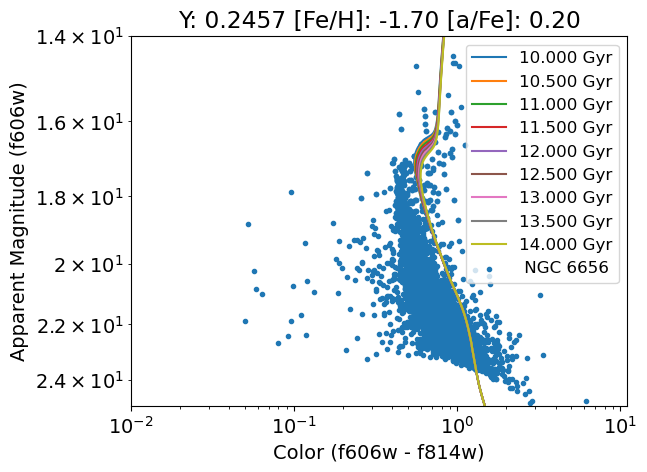

In [57]:
# NGC 6656
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6656/tmp1670625985.iso')
reddening = red_NGC6656
distance = dist_canon_NGC6656
tblr = Table(data=ascii.read(data_names[5]), names=column_names)
y_NGC6656 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6656 = 11.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [58]:
## NGC 104
metal_NGC104

-0.72

10.000 Gyr : 1041653.9458612865
10.500 Gyr : 1041654.9574131566
11.000 Gyr : 1041652.9424653642
11.500 Gyr : 1041653.7009410593
12.000 Gyr : 1041652.1521107582
12.500 Gyr : 1041652.5096829345
13.000 Gyr : 1041651.5114252695
13.500 Gyr : 1041651.8164509994
14.000 Gyr : 1041650.4680082995


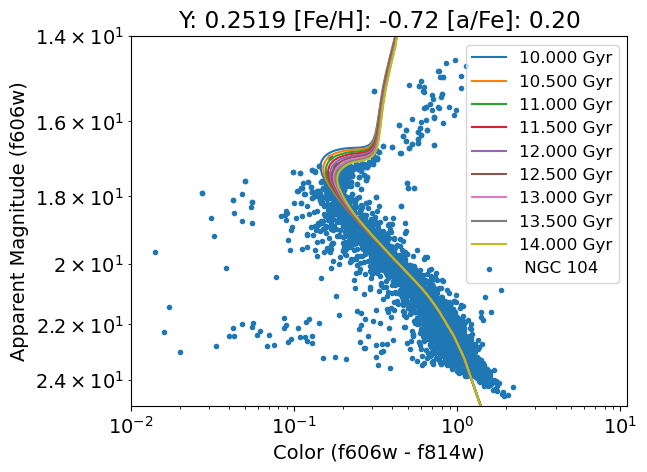

In [59]:
# NGC 104
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC104/tmp1670725478.iso')
reddening = red_NGC104
distance = dist_canon_NGC104
tblr = Table(data=ascii.read(data_names[6]), names=column_names)
y_NGC104 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC104 = 14.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [60]:
## NGC 6254
metal_NGC6254

-1.56

10.000 Gyr : 23665502.512839776
10.500 Gyr : 23812521.1347747
11.000 Gyr : 23313577.819840163
11.500 Gyr : 23688466.332663126
12.000 Gyr : 23690352.970055494
12.500 Gyr : 23854841.676252402
13.000 Gyr : 23718147.381572023
13.500 Gyr : 23763973.095877416
14.000 Gyr : 23741040.02275838


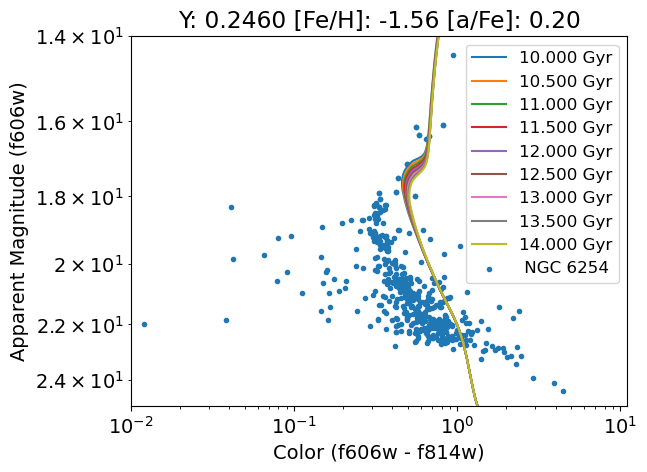

In [61]:
# NGC 6254
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6254/tmp1670626067.iso')
reddening = red_NGC6254
distance = dist_canon_NGC6254
tblr = Table(data=ascii.read(data_names[7]), names=column_names)
y_NGC6254 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6254 = 11.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [62]:
## NGC 6809
metal_NGC6809

-1.94

10.000 Gyr : 3560901.242065032
10.500 Gyr : 3567936.6214983235
11.000 Gyr : 3547431.0029426343
11.500 Gyr : 3562762.717052147
12.000 Gyr : 3562949.7285409095
12.500 Gyr : 3562342.845275749
13.000 Gyr : 3559048.925378418
13.500 Gyr : 3569128.8720867895
14.000 Gyr : 3572487.716458237


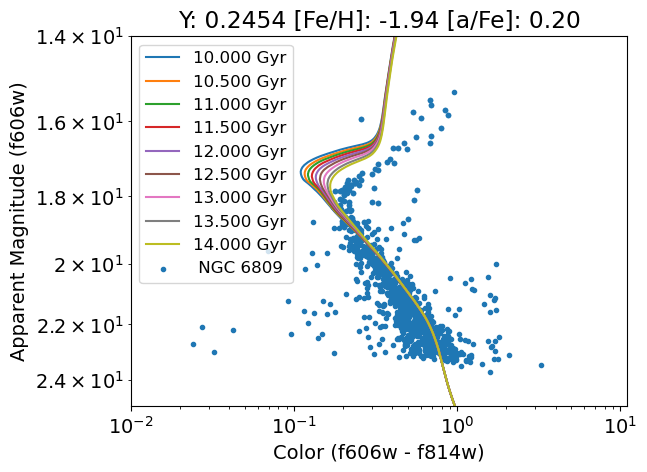

In [63]:
# NGC 6809
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6809/tmp1670626173.iso')
reddening = red_NGC6809
distance = dist_canon_NGC6809
tblr = Table(data=ascii.read(data_names[8]), names=column_names)
y_NGC6809 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6809 = 11.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [64]:
## NGC 6121
metal_NGC6121

-1.16

10.000 Gyr : 3112837.2654781705
10.500 Gyr : 3112836.815454938
11.000 Gyr : 3112835.6948133796
11.500 Gyr : 3112834.0555038936
12.000 Gyr : 3112832.3498790935
12.500 Gyr : 3112830.970690767
13.000 Gyr : 3112829.507914157
13.500 Gyr : 3112828.115893105
14.000 Gyr : 3112826.5287460536


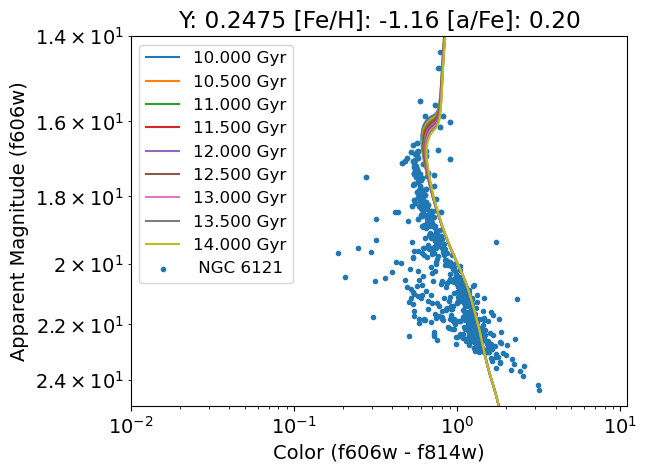

In [65]:
# NGC 6121
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6121/tmp1670626298.iso')
reddening = red_NGC6121
distance = dist_canon_NGC6121
tblr = Table(data=ascii.read(data_names[9]), names=column_names)
y_NGC6121 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6121 = 14.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [66]:
## NGC 6397
metal_NGC6397

-2.02

10.000 Gyr : 56.72283678595731
10.500 Gyr : 56.7425877421514
11.000 Gyr : 56.78129421101275
11.500 Gyr : 56.82765872702343
12.000 Gyr : 56.864208549641916
12.500 Gyr : 56.92740603803356
13.000 Gyr : 56.98727808091866
13.500 Gyr : 57.03480697086782
14.000 Gyr : 57.101556098539504


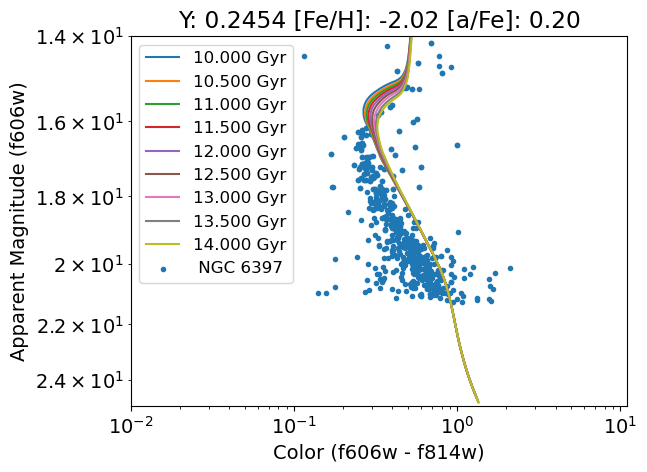

In [67]:
# NGC 6397
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6397/tmp1670626387.iso')
reddening = red_NGC6397
distance = dist_canon_NGC6397
tblr = Table(data=ascii.read(data_names[10]), names=column_names)
y_NGC6397 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6397 = 10.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [68]:
## NGC 6752
metal_NGC6752

-1.54

10.000 Gyr : 1038083.5015106449
10.500 Gyr : 1038082.2234927333
11.000 Gyr : 1038081.2215499845
11.500 Gyr : 1038080.559774384
12.000 Gyr : 1038079.1935297091
12.500 Gyr : 1038078.5257453206
13.000 Gyr : 1038077.5196613177
13.500 Gyr : 1038076.7606816669
14.000 Gyr : 1038075.7281781418


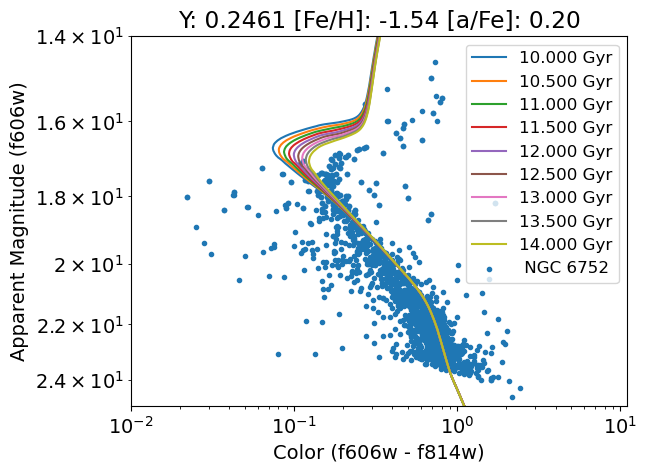

In [69]:
# NGC 6752
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC6752/tmp1670626463.iso')
reddening = red_NGC6752
distance = dist_canon_NGC6752
tblr = Table(data=ascii.read(data_names[11]), names=column_names)
y_NGC6752 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC6752 = 14.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [70]:
## NGC 5139
metal_NGC5139

-1.53

10.000 Gyr : 1643536.8031556758
10.500 Gyr : 1653583.3652037075
11.000 Gyr : 1615998.0239724962
11.500 Gyr : 1633137.707156569
12.000 Gyr : 1651208.67436221
12.500 Gyr : 1643306.731319789
13.000 Gyr : 1649943.1558527006
13.500 Gyr : 1647022.757976216
14.000 Gyr : 1652005.106854036


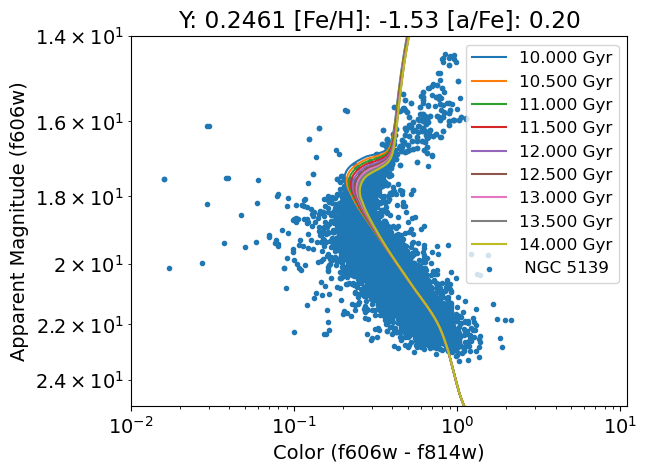

In [71]:
# NGC 5139
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC5139/tmp1670626837.iso')
reddening = red_NGC5139
distance = dist_canon_NGC5139
tblr = Table(data=ascii.read(data_names[12]), names=column_names)
y_NGC5139 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC5139 = 11.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [72]:
## NGC 4833
metal_NGC4833

-1.85

10.000 Gyr : 2539201.753633561
10.500 Gyr : 2543801.2834245414
11.000 Gyr : 2518649.5666448404
11.500 Gyr : 2534335.2919914415
12.000 Gyr : 2533129.8018488004
12.500 Gyr : 2535624.4988649427
13.000 Gyr : 2539065.793630761
13.500 Gyr : 2532215.252133583
14.000 Gyr : 2542498.088272583


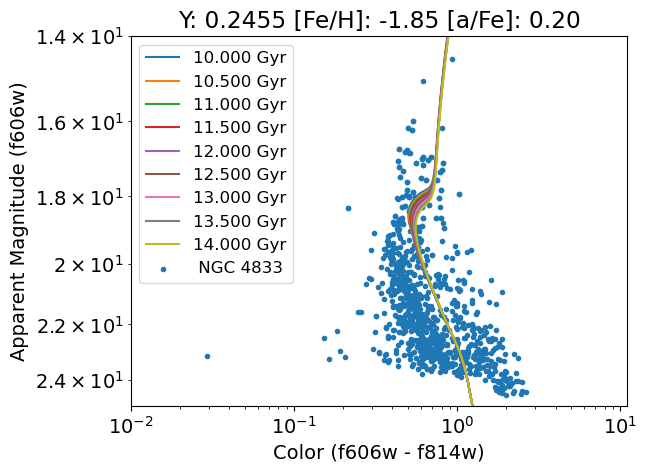

In [73]:
# NGC 4833
data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC4833/tmp1670626913.iso')
reddening = red_NGC4833
distance = dist_canon_NGC4833
tblr = Table(data=ascii.read(data_names[13]), names=column_names)
y_NGC4833 = fit_isochrone(data_iso, tblr, reddening, distance)
plot_colormag(tbl=tblr, show=False)
age_calc_NGC4833 = 11.0 #* u.Gyr
title = tblr.meta['comments'][12].split(':')[1].replace(' ', '')
plt.legend(fontsize=12)
plt.savefig('/mnt/c/Users/panda/Documents/Stars/isochronefits/isochronefit_' + title + '.png', bbox_inches='tight', dpi=300)


In [74]:
#def find_nearest(array, value):
#    array = np.asarray(array)
#    idx = (np.abs(array - value)).argmin()
#    return idx#array[idx]
#
#def calc_distance(x1, y1, x2, y2):
#    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

In [75]:
#tbl_data = Table(data=ascii.read(data_names[6]), names=column_names)
#print(tbl_data.meta['comments'][12].split(':')[1])
#reddening = red_NGC104
#distance = dist_canon_NGC104
#
#dat_colors = tbl_data['f606w_TotMag'] - tbl_data['f814w_TotMag']
#dat_magnis = tbl_data['f606w_TotMag']
#
#data_iso = glob.glob('/mnt/c/Users/panda/Documents/Stars/isochrone_data/NGC104/tmp1670727136.iso')
#col_names = data=ascii.read(data_iso[0]).meta['comments'][8].split()
#tbl = Table(data=ascii.read(data_iso[0]), names=col_names)
#
#v_band = tbl['F606W'] - 0.044 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(1)*reddening
#i_band = tbl['F814W'] + 0.309 + 5*np.log10(distance.to(u.pc).value) - 5 + 3.1*(0.482)*reddening
#
#iso_colors = v_band - i_band
#iso_magnis = v_band
#
#print(dat_magnis[50])
#find_nearest(iso_magnis, value=dat_magnis[50])

In [76]:
#inter = interp1d(iso_magnis, iso_colors)

In [77]:
#ex_point

In [78]:
#pp = 150
#
#dist_min = 9999
#mag_min = 0
#col_min = 0
#mags_ex = np.linspace(19, 25, num=50)
#ex_point = (dat_colors[pp], dat_magnis[pp])
#inter = interp1d(iso_magnis, iso_colors)
#plt.scatter(dat_colors[pp], dat_magnis[pp])
#
#for magi in range(len(iso_magnis)):
#    mag = iso_magnis[magi]
#    col = iso_colors[magi]#inter(mag)
#    dist = calc_distance(mag, col, ex_point[1], ex_point[0])
#    if col > 0.4 and col < 0.65 and mag < 22 and mag > 20:
#        plt.scatter(col, mag, color='tab:red')
#        plt.plot([col, ex_point[0]], [mag, ex_point[1]])
#        plt.text(col, mag, s=dist)
#    if dist <= dist_min:
#        dist_min = dist
#        print(dist_min, mag, col)
#        mag_min = mag
#        col_min = col
#plt.scatter(col_min, mag_min, color='black', marker='x')
##plt.xlim(0.4, 0.6)
##plt.ylim(20, 22)

In [79]:
#plt.plot(iso_colors, iso_magnis)
##plt.xlim(0.1, 0.4)
#plt.scatter(dat_colors[pp], dat_magnis[pp])
##plt.scatter(inter(dat_magnis[50]), dat_magnis[50])
#plt.scatter(col_min, mag_min)

In [80]:
#residual(iso_colors, iso_magnis, dat_colors, dat_magnis)

2.  Present your determined ages for each cluster in a table, with the appropriate  parameters for each. Comment on whether you are able to find an age-metallicity  relation for Globular clusters.


In [81]:
y_used = [
    y_NGC362 ,
    y_NGC6362,
    y_NGC6218,
    y_NGC6838,
    y_NGC3201,
    y_NGC6656,
    y_NGC104 ,
    y_NGC6254,
    y_NGC6809,
    y_NGC6121,
    y_NGC6397,
    y_NGC6752,
    y_NGC5139,
    y_NGC4833
]

In [82]:
a_Fe = np.full(len(y_used), 0.2)

In [83]:
age_canon_NGC104  = 13.06 #* u. Gyr
age_canon_NGC362  = 11.0  #* u. Gyr
age_canon_NGC3201 = 12.2  #* u. Gyr
age_canon_NGC4833 = 12.54 #* u. Gyr
age_canon_NGC5139 = 11.52 #* u. Gyr
age_canon_NGC6121 = 12.2  #* u. Gyr
age_canon_NGC6218 = 13.8  #* u. Gyr
age_canon_NGC6254 = 11.39 #* u. Gyr
age_canon_NGC6362 = 13.57 #* u. Gyr
age_canon_NGC6397 = 13.4  #* u. Gyr
age_canon_NGC6656 = 12.0  #* u. Gyr
age_canon_NGC6752 = 11.78 #* u. Gyr
age_canon_NGC6809 = 12.3  #* u. Gyr
age_canon_NGC6838 = 12.0  #* u. Gyr # https://ui.adsabs.harvard.edu/abs/2015AJ....150...51D/abstract

ages_canon = [
                    age_canon_NGC362 ,
                    age_canon_NGC6362,
                    age_canon_NGC6218,
                    age_canon_NGC6838,
                    age_canon_NGC3201,
                    age_canon_NGC6656,
                    age_canon_NGC104 ,
                    age_canon_NGC6254,
                    age_canon_NGC6809,
                    age_canon_NGC6121,
                    age_canon_NGC6397,
                    age_canon_NGC6752,
                    age_canon_NGC5139,
                    age_canon_NGC4833
                    ]

In [84]:
ages_calc = [
                    age_calc_NGC362 ,
                    age_calc_NGC6362,
                    age_calc_NGC6218,
                    age_calc_NGC6838,
                    age_calc_NGC3201,
                    age_calc_NGC6656,
                    age_calc_NGC104 ,
                    age_calc_NGC6254,
                    age_calc_NGC6809,
                    age_calc_NGC6121,
                    age_calc_NGC6397,
                    age_calc_NGC6752,
                    age_calc_NGC5139,
                    age_calc_NGC4833
                    ]

$\textbf{Present your determined ages for each cluster in a table, with the appropriate  parameters for each.}$

In [85]:
names = ['Cluster Name', 'Distance Modulus (calc)', 'Distance Modulus (canon)', '[Fe/H]', 'Y', '[$\alpha$/Fe]', 'E(B-V)', 'Age (calc)', 'Age (canon)', 'Distance (canon)']
result = Table([cluster_names, mods_calc, mods_canon, metallicity_canon, y_used, a_Fe, reddening_canon, ages_calc*u.Gyr, ages_canon*u.Gyr, distances_canon], names=names)

In [87]:
result.write('/mnt/c/Users/panda/Documents/Stars/result_tab.txt', format='latex', overwrite=True)
result

Cluster Name,Distance Modulus (calc),Distance Modulus (canon),[Fe/H],Y,[$lpha$/Fe],E(B-V),Age (calc),Age (canon),Distance (canon)
,,,,,,,Gyr,Gyr,kpc
str8,float64,float64,float64,float64,float64,float64,float64,float64,float64
NGC 362,14.17727163220618,14.83,-1.26,0.247,0.2,0.05,10.0,11.0,8.6
NGC 6362,12.939581483973301,14.68,-0.99,0.2489,0.2,0.09,14.0,13.57,7.6
NGC 6218,13.359684960665868,14.01,-1.37,0.2465,0.2,0.19,10.0,13.8,4.8
NGC 6838,12.915790583409317,13.8,-0.78,0.251,0.2,0.25,8.0,12.0,4.0
NGC 3201,13.408564016128226,14.2,-1.59,0.2459,0.2,0.24,14.0,12.2,4.9
NGC 6656,12.969342133159925,13.6,-1.7,0.2457,0.2,0.34,11.0,12.0,3.2
NGC 104,13.37,13.37,-0.72,0.2519,0.2,0.04,14.0,13.06,4.5
NGC 6254,12.90360051150118,14.08,-1.56,0.246,0.2,0.28,11.0,11.39,4.4


$\textbf{Comment on whether you are able to find an age-metallicity  relation for Globular clusters.}$

There does not seem to be a relationship between the metallicity and ages of the clusters. We expect that the younger the cluster, the more metal-rich it is. There may be a few outliers skewing the results and ruining the relationship, as some of the clusters seem to have ages and metallicities that follow the expected downward trend. 

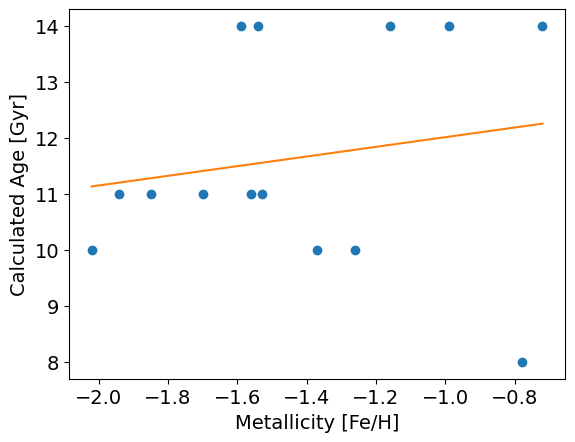

In [88]:
fit_lin = curve_fit(lin_fit, metallicity_canon, ages_calc)[0]
plt.plot(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), 
         lin_fit(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), fit_lin[0], fit_lin[1]), color='tab:orange')
plt.scatter(metallicity_canon, ages_calc)
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Calculated Age [Gyr]')
plt.savefig('/mnt/c/Users/panda/Documents/Stars/age_metal_calc.png', bbox_inches='tight', dpi=300)


In [89]:
fit_lin

array([ 0.86305239, 12.8764056 ])

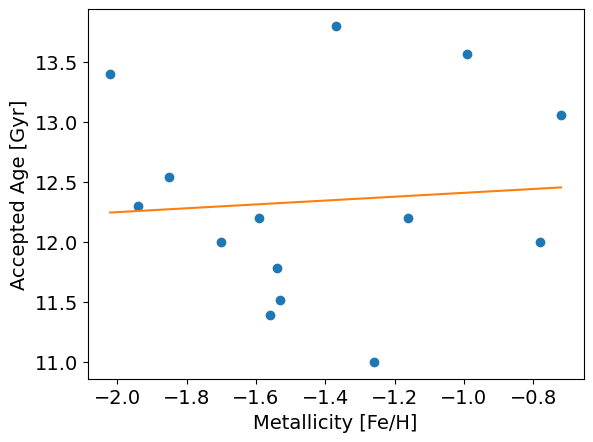

In [90]:
fit_lin = curve_fit(lin_fit, metallicity_canon, ages_canon)[0]
plt.plot(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), 
         lin_fit(np.linspace(np.min(metallicity_canon), np.max(metallicity_canon)), fit_lin[0], fit_lin[1]), color='tab:orange')
plt.scatter(metallicity_canon, ages_canon)
plt.xlabel('Metallicity [Fe/H]')
plt.ylabel('Accepted Age [Gyr]')
plt.savefig('/mnt/c/Users/panda/Documents/Stars/age_metal_canon.png', bbox_inches='tight', dpi=300)


In [91]:
fit_lin

array([ 0.16096354, 12.57006287])

In [ ]:
#dist_math = np.zeros((len(data_names), 2))*u.kpc
#i=0
#for dat in data_names:
#    tbl = Table(data=ascii.read(dat), names=column_names)
#    tes = magshift(tbl)
#    
#    mA = ref_magshift[1]
#    mB = tes[1]
#    shift = mA - mB
#    #print(mA, mB, shift, dist_modulus(mA, mB, dist_ref))
#    print(tbl.meta['comments'][12].split(':')[1])
#    dist = 10**((tes[1] - ref_magshift[1])/5.)*dist_ref
#    #print(dist)
#    #ref_magshift[2]
#    #tes[2]
#    #dist_ref_err
#    # error of x - y is sqrt(x^2 + y^2)
#    one = np.sqrt(ref_magshift[2]**2+tes[2]**2)
#    # error of z=x/y is dz = sqrt((dx/x)^2 + (dy/y)^2)*z
#    two = one / 5.
#    # error of 10^(x) is ln(10)*10^x*dx
#    three = np.log(10)*10**((tes[1] - ref_magshift[1])/5.)*two
#    # error of z=x*y is dz = sqrt((dx/x)^2 + (dy/y)^2)*z
#    four = np.sqrt((three/(10**((tes[1] - ref_magshift[1])/5.)))**2+(dist_ref_err/dist_ref)**2)*10**((tes[1] - ref_magshift[1])/5.)*dist_ref
#    print(shift, dist, '+-', four)
#    #tbl['Distance'] = dist
#    #tbl['Distance_Error'] = four
#    dist_math[int(i)][0] = dist#.value
#    dist_math[int(i)][1] = four#.value
#    
#    i+=1
#    #tbl.write(dat, format='ascii')

In [ ]:
#dist_canon_E3      = 8.1*u.kpc
#dist_canon_NGC362  = 8.6*u.kpc
#dist_canon_NGC6362 = 5.1*u.kpc
#dist_canon_NGC6218 = 4.8*u.kpc
#dist_canon_NGC6838 = 4.0*u.kpc
#dist_canon_NGC3201 = 4.9*u.kpc
#dist_canon_NGC6656 = 3.2*u.kpc
#dist_canon_NGC104  = 4.5*u.kpc
#dist_canon_NGC6254 = 4.4*u.kpc
#dist_canon_NGC6809 = 5.4*u.kpc
#dist_canon_NGC6121 = 2.2*u.kpc
#dist_canon_NGC6397 = 2.3*u.kpc
#dist_canon_NGC6752 = 7.9*u.kpc
#dist_canon_NGC5139 = 5.2*u.kpc
#dist_canon_NGC6838 = 4.0*u.kpc
#dist_canon_NGC4833 = 6.6*u.kpc
#
#dist_canon = [dist_canon_E3,     
#              dist_canon_NGC362, 
#              dist_canon_NGC6362,
#              dist_canon_NGC6218,
#              dist_canon_NGC6838,
#              dist_canon_NGC3201,
#              dist_canon_NGC6656,
#              dist_canon_NGC104, 
#              dist_canon_NGC6254,
#              dist_canon_NGC6809,
#              dist_canon_NGC6121,
#              dist_canon_NGC6397,
#              dist_canon_NGC6752,
#              dist_canon_NGC5139,
#              dist_canon_NGC6838,
#              dist_canon_NGC4833
#             ]

In [ ]:
#for d in range(len(dist_canon)):
#    dat = data_names[d]
#    tbl = Table(data=ascii.read(dat), names=column_names)
#    print(tbl.meta['comments'][12].split(':')[1])
#    print('Accepted Distance', dist_canon[d])
#    print('Calculated Distance:', dist_math[d][0])
#    perc = np.abs(dist_canon[d] - dist_math[d][0])/dist_canon[d]*100
#    print('Percent Error:', perc)
#    print()
#with quantity_support():
#    plt.errorbar(dist_canon*u.kpc, dist_math[:,0], yerr=dist_math[:,1], fmt='.')
#    plt.xlabel('Accepted Distance')
#    plt.ylabel('Calculated Distance')